<a href="https://colab.research.google.com/github/zuulaika/Projet-python/blob/main/CODE_PRINCIPAL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install xlrd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


# 1/ Nettoyage et modélisation des données élections

Récuperation des données sur les élections européennes de 2024 et 2019

In [ ]:
url = "https://www.data.gouv.fr/api/1/datasets/r/2690a1ed-13fb-4164-a006-2878000bf4c1"
ee2024= pd.read_excel(url, sheet_name=0)
ee2024.head()

,Code département,Libellé département,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,% Exprimés/inscrits,% Exprimés/votants,...,% Voix/exprimés 37,Sièges 37,Numéro de panneau 38,Nuance liste 38,Libellé abrégé de liste 38,Libellé de liste 38,Voix 38,% Voix/inscrits 38,% Voix/exprimés 38,Sièges 38
0,01,Ain,449217,244260,"54,37%",204957,"45,63%",237523,"52,87%","97,24%",...,"0,03%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,4,"0,00%","0,00%",0
1,02,Aisne,373728,189750,"50,77%",183978,"49,23%",183689,"49,15%","96,81%",...,"0,03%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,9,"0,00%","0,00%",0
2,03,Allier,249428,138833,"55,66%",110595,"44,34%",131770,"52,83%","94,91%",...,"0,07%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,2,"0,00%","0,00%",0
3,04,Alpes-de-Haute-Provence,129172,74445,"57,63%",54727,"42,37%",72337,"56,00%","97,17%",...,"0,04%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,0,"0,00%","0,00%",0
4,05,Hautes-Alpes,115059,66931,"58,17%",48128,"41,83%",64928,"56,43%","97,01%",...,"0,07%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,1,"0,00%","0,00%",0


In [ ]:
url= "https://www.data.gouv.fr/api/1/datasets/r/4a26fcae-494b-4ef6-82bb-49fdd32c8159"
ee2019= pd.read_excel(url, sheet_name=0)
ee2019.head()


,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253
0,01,Ain,417781,209845,50.23,207936,49.77,4674,1.12,2.25,...,8,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,273,0.07,0.14
1,02,Aisne,371723,176251,47.41,195472,52.59,4970,1.34,2.54,...,10,0.0,0.01,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,49,0.01,0.03
2,03,Allier,248389,113300,45.61,135089,54.39,4331,1.74,3.21,...,2,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,16,0.01,0.01
3,04,Alpes-de-Haute-Provence,126239,56609,44.84,69630,55.16,1614,1.28,2.32,...,0,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,2,0.00,0.00
4,05,Hautes-Alpes,109697,49410,45.04,60287,54.96,1575,1.44,2.61,...,1,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,9,0.01,0.02


In [ ]:
#on va separé les informations sur les départements et les informations sur les partis
ee2019_info = ee2019.iloc[:, :16]
ee2019_parti= ee2019.iloc[:, 16:]

In [ ]:
#On renomme les colonnes car il n'ya pas de noms de colonnes à par pour le LFI
noms_premieres_colonnes = ['N°Liste', 'Libellé Abrégé Liste', 'Libellé Etendu Liste','Nom Tête de Liste', 'Voix', '% Voix/Ins', '% Voix/Exp']

#On reporte les noms dans tout le tableau
nb_blocs = len(ee2019_parti.columns)//7
nouveaux_noms = noms_premieres_colonnes * nb_blocs
ee2019_parti.columns = nouveaux_noms

In [ ]:
#Sachant qu'il ya des colonnes inutiles, on va juste se concentrer sur le nom du parti et les infos sur le % de voix/exprimées
cols_par_parti = 7
cols_utiles = [1,6]

#On selectionne les colonnes correspondantes pour chaque partie
cols_a_garder = []
for i in range(0, ee2019_parti.shape[1], cols_par_parti):
    cols_a_garder.extend([i + j for j in cols_utiles])

ee2019_parti_n = ee2019_parti.iloc[:, cols_a_garder]


ee2019_parti_n.head()


,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,...,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp
0,LA FRANCE INSOUMISE,4.81,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.07,RENAISSANCE,22.36,...,EUROPE ÉCOLOGIE,13.81,PARTI ANIMALISTE,2.05,LES OUBLIES DE L'EUROPE,0.23,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.14
1,LA FRANCE INSOUMISE,6.28,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.05,RENAISSANCE,15.65,...,EUROPE ÉCOLOGIE,7.83,PARTI ANIMALISTE,2.58,LES OUBLIES DE L'EUROPE,0.24,UDLEF,0.01,EUROPE AU SERVICE PEUPLES,0.03
2,LA FRANCE INSOUMISE,6.71,UNE FRANCE ROYALE,0.02,LA LIGNE CLAIRE,0.01,PARTI PIRATE,0.03,RENAISSANCE,19.55,...,EUROPE ÉCOLOGIE,9.05,PARTI ANIMALISTE,2.38,LES OUBLIES DE L'EUROPE,0.30,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.01
3,LA FRANCE INSOUMISE,8.08,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.17,RENAISSANCE,19.94,...,EUROPE ÉCOLOGIE,13.19,PARTI ANIMALISTE,2.21,LES OUBLIES DE L'EUROPE,0.28,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.00
4,LA FRANCE INSOUMISE,6.73,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.06,RENAISSANCE,20.91,...,EUROPE ÉCOLOGIE,16.07,PARTI ANIMALISTE,2.07,LES OUBLIES DE L'EUROPE,0.33,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.02


on va choisir les partis à garder: 2 methodes

In [ ]:
#methode 1: on conserve les partis qui sont les + votés au niveaux national
cols_par_bloc=2
somme_voix_exp = []

for i in range(0, ee2019_parti_n.shape[1], cols_par_bloc):
    bloc = ee2019_parti_n.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0,0]
    total_parti = bloc.iloc[:, 1].sum()  # somme des %voix/exp pour un parti sur tous les departements
    somme_voix_exp.append((nom_parti, total_parti))

df_somme = pd.DataFrame(somme_voix_exp, columns=['Parti','total%'])
df_somme = df_somme.sort_values('total%', ascending=False)
top_parti = df_somme.iloc[:10,0]   #10 tops partis niveau national

print(top_parti)


22         PRENEZ LE POUVOIR
4                RENAISSANCE
29           EUROPE ÉCOLOGIE
28       UNION DROITE-CENTRE
0        LA FRANCE INSOUMISE
11            ENVIE D'EUROPE
14          DEBOUT LA FRANCE
20           LISTE CITOYENNE
10             LES EUROPÉENS
18    POUR L'EUROPE DES GENS
Name: Parti, dtype: object


In [ ]:
#methode 2: on selectionne les 15 meilleurs partis par département et on ne garde que les 10 qui sont dans le top 15 de tous les departements.

#on construit un tableau long avec voix et total exprimé par département
df= []

for i in range(0, ee2019_parti_n.shape[1], cols_par_bloc):
    bloc = ee2019_parti_n.iloc[:, i:i+cols_par_bloc]
    dfi = pd.DataFrame({
        "Dep": ee2019_parti_n.index +1 ,
        "Parti": bloc.iloc[:,0],
        "V/Exp": bloc.iloc[:,1]
    })
    df.append(dfi)
df_long = pd.concat(df)

#Top 15 partis par département
df_long_sort = df_long.sort_values(["Dep","V/Exp"], ascending=[True, False])
df_top15 = df_long_sort.groupby("Dep").head(15)

df_final = df_top15.pivot(index="Dep", columns="Parti", values="V/Exp")
df_final = df_final.fillna(0)              #0 quand le parti n'est pas dans le top 15 du departement

# on retire les colonnes où il y a au moins un 0
cols_a_gar= df_final.columns[(df_final != 0).all()]
df_final_filtre = df_final[cols_a_gar]

print(df_final_filtre.columns)

Index(['ENSEMBLE POUR LE FREXIT', 'ENVIE D'EUROPE', 'EUROPE ÉCOLOGIE',
       'LA FRANCE INSOUMISE', 'LES EUROPÉENS', 'LISTE CITOYENNE',
       'POUR L'EUROPE DES GENS', 'PRENEZ LE POUVOIR', 'RENAISSANCE',
       'UNION DROITE-CENTRE'],
      dtype='object', name='Parti')


Afin d’éviter d’inclure des partis faiblement, nous avons retenu uniquement les partis ayant obtenu le plus grand nombre de voix au niveau national. Cette approche privilégie partis réellement influents dans le scrutin et structurent le paysage politique (gauche, droite, centre).
Contrairement à une sélection fondée sur la seule présence dans tous les départements, qui aurait conservé des partis très faibles électoralement comme 'Ensemble pour le Frexit', ce choix permet de travailler sur un ensemble politiquement pertinent et statistiquement exploitable meme en n'incluant pas des parties qui sont majoritaires dans seulement un departement.

In [ ]:
#on garde les partis de la methode 1
from fonctions_nettoyage import selection_top_partis

ee2019_p_d, recap_2019 = selection_top_partis(ee2019_parti_n)

In [ ]:
#on va mettre les noms des parties dans les colonnes
from fonctions_nettoyage import chang_col
ee2019_p_df=chang_col(ee2019_p_d)


Debut de l'analyse du tableau 2019

In [ ]:
ee19p=pd.concat([ee2019_info.iloc[:,1] ,ee2019_p_df], axis=1)
ee19p

,Libellé du département,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
0,Ain,4.81,22.36,2.80,5.12,4.26,1.61,2.63,24.31,10.64,13.81
1,Aisne,6.28,15.65,2.17,3.99,4.55,2.06,2.35,39.88,7.19,7.83
2,Allier,6.71,19.55,3.00,5.73,3.44,4.94,3.34,25.44,11.13,9.05
3,Alpes-de-Haute-Provence,8.08,19.94,1.70,5.11,3.93,3.22,2.83,27.16,6.51,13.19
4,Hautes-Alpes,6.73,20.91,2.26,5.79,3.93,2.46,3.05,23.49,7.68,16.07
...,...,...,...,...,...,...,...,...,...,...,...
102,Polynésie française,4.12,43.37,1.62,2.39,2.61,1.47,0.84,16.99,9.49,11.08
103,Saint-Pierre-et-Miquelon,11.90,18.27,1.92,10.97,0.00,1.53,5.37,24.02,6.98,14.50
104,Wallis et Futuna,7.69,37.13,5.47,4.93,0.00,1.98,3.73,13.33,19.20,0.30
105,Saint-Martin/Saint-Barthélemy,6.13,20.15,2.71,5.01,3.10,0.86,2.59,28.38,11.81,13.06


In [ ]:
ee19p.describe()

,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,6.640748,21.328598,2.508692,6.144206,3.580093,2.443551,3.199720,24.644393,8.887009,12.604393
std,2.213281,4.778285,0.718599,1.692694,1.003508,0.952475,0.864229,6.617375,2.587698,3.333147
min,3.070000,8.870000,0.820000,2.370000,0.000000,0.860000,0.840000,7.100000,3.360000,0.300000
25%,5.350000,18.830000,2.095000,5.030000,2.995000,1.835000,2.655000,20.835000,7.330000,10.590000
50%,6.280000,20.520000,2.460000,5.930000,3.650000,2.270000,3.120000,24.550000,8.310000,12.360000
75%,7.190000,22.880000,2.835000,7.020000,4.215000,3.010000,3.680000,28.850000,9.785000,14.300000
max,19.030000,43.370000,5.470000,10.970000,5.530000,5.830000,6.040000,46.120000,19.560000,22.860000


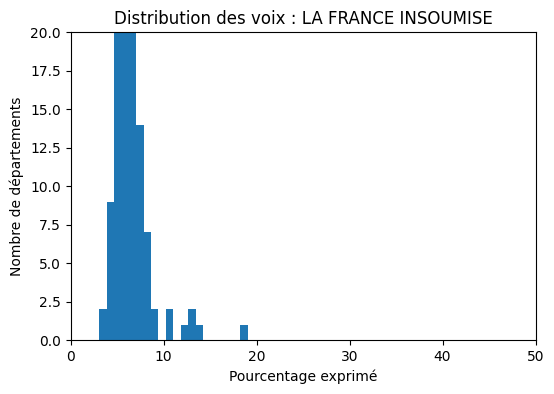

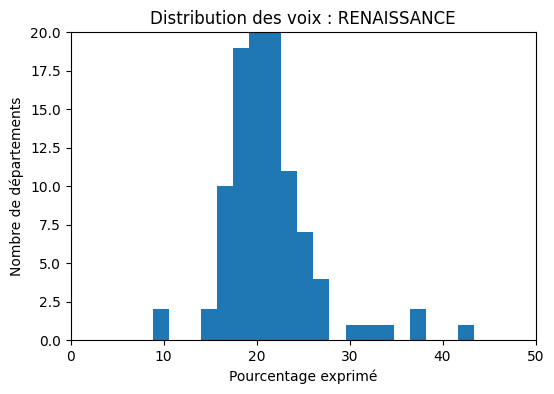

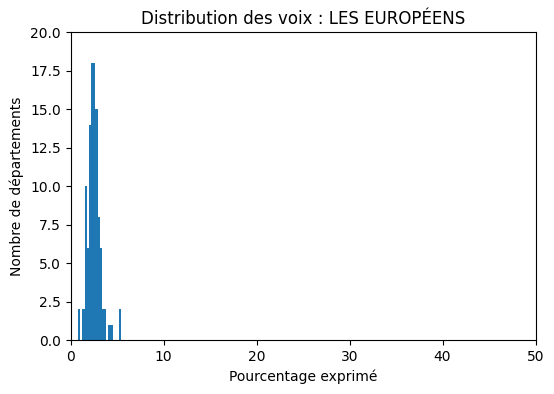

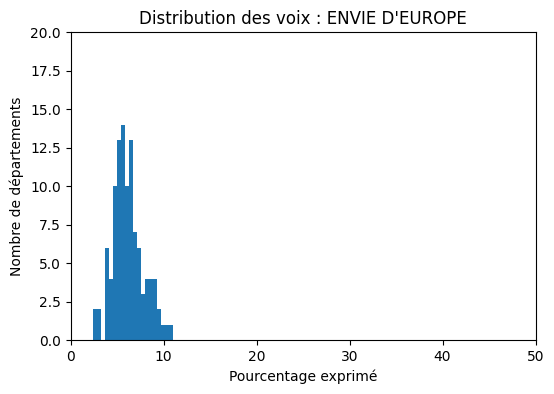

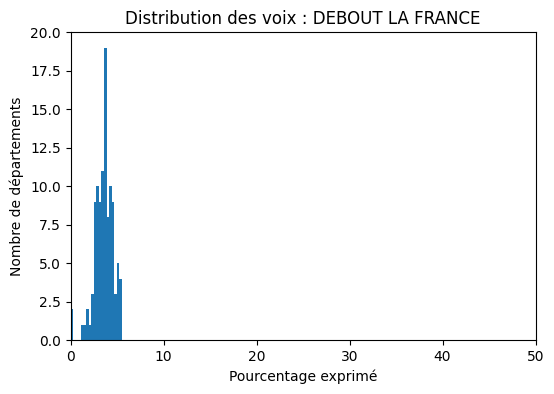

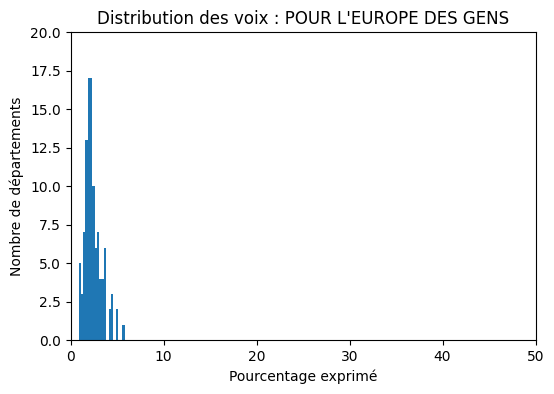

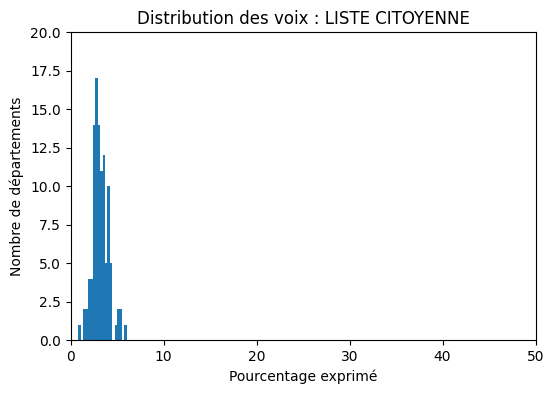

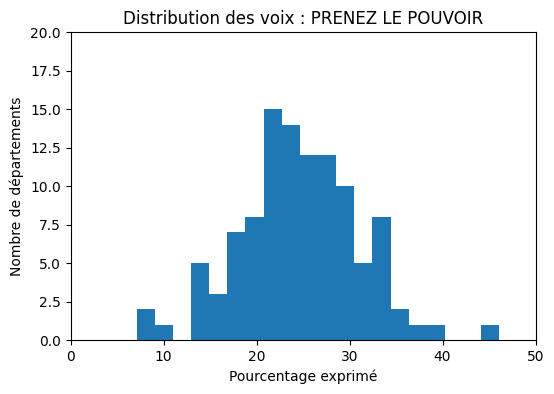

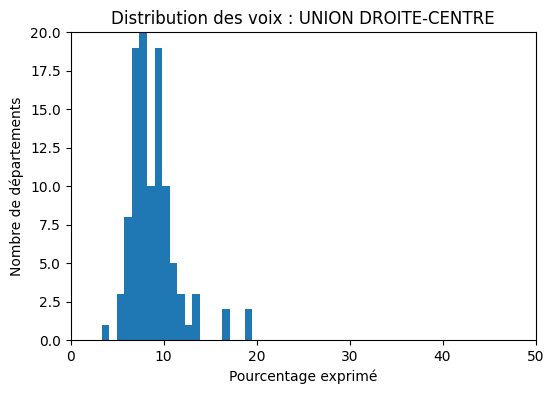

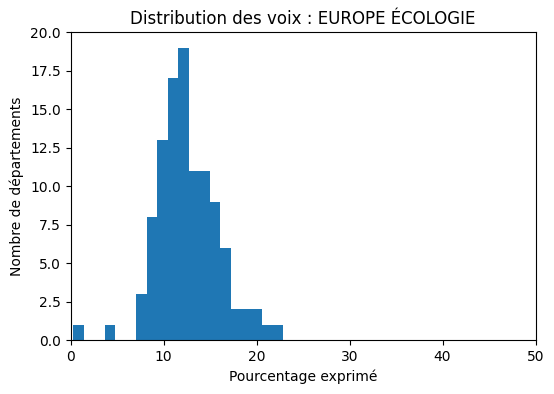

In [ ]:
import matplotlib.pyplot as plt

for col in ee2019_p_df.columns:
    plt.figure(figsize=(6,4))
    plt.ylim(0,20)
    plt.xlim(0,50)
    plt.hist(ee2019_p_df[col], bins=20)
    plt.title(f"Distribution des voix : {col}")
    plt.xlabel("Pourcentage exprimé")
    plt.ylabel("Nombre de départements")
    plt.show()

La fonction describe et les histogrammes nous montrent une domination du parti 'PRENEZ LE POUVOIR' avec un moyenne de %voix/exp de 24.6 et un histogramme plus vers la droite et prenant des valeurs plus élevées que ceux des autres. Il est suivi de près par 'RENAISSANCE' qui a une moyenne à 21.3 et ' EUROPE ECOLOGIQUE' avec une moyenne de 12.6

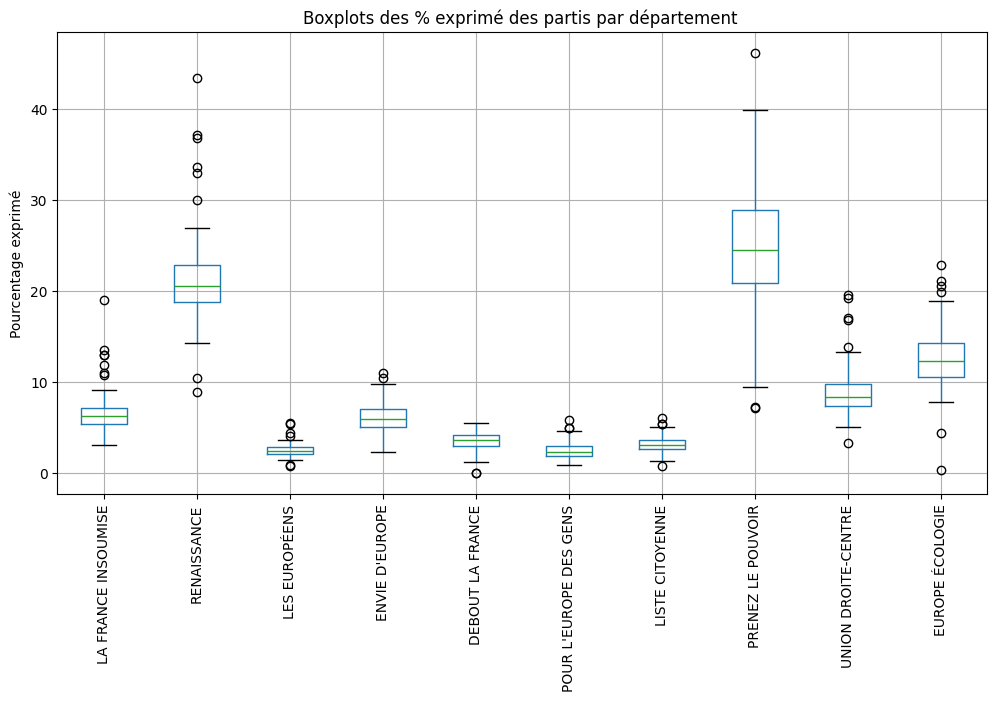

In [ ]:
plt.figure(figsize=(12,6))
ee2019_p_df.boxplot(rot=90)
plt.title("Boxplots des % exprimé des partis par département ")
plt.ylabel("Pourcentage exprimé")
plt.show()


L'analyse des boîtes à moustaches révèle une hiérarchie électorale marquée, dominée par la liste 'PRENEZ LE POUVOIR' qui affiche la médiane la plus élevée (environ 25 %) ainsi qu'une forte disparité territoriale, comme en témoignent l'étirement de sa boîte et la présence d'un score exceptionnel dépassant les 45 %. Elle est suivie par 'RENAISSANCE', qui se stabilise autour de 20 % mais présente de nombreux points atypiques vers le haut, suggérant des bastions électoraux très spécifiques. À l'inverse, des formations comme 'LES EUROPÉENS' ou 'DEBOUT LA FRANCE' se caractérisent par une grande homogénéité et des scores uniformément bas, illustrés par des boîtes très compactes proches de l'axe des abscisses. Entre ces deux blocs, 'EUROPE ÉCOLOGIE' et l 'UNION DROITE-CENTRE' occupent une position intermédiaire avec une dispersion modérée, soulignant un paysage politique fragmenté où les écarts de performance entre les départements sont particulièrement prononcés pour les partis de tête.

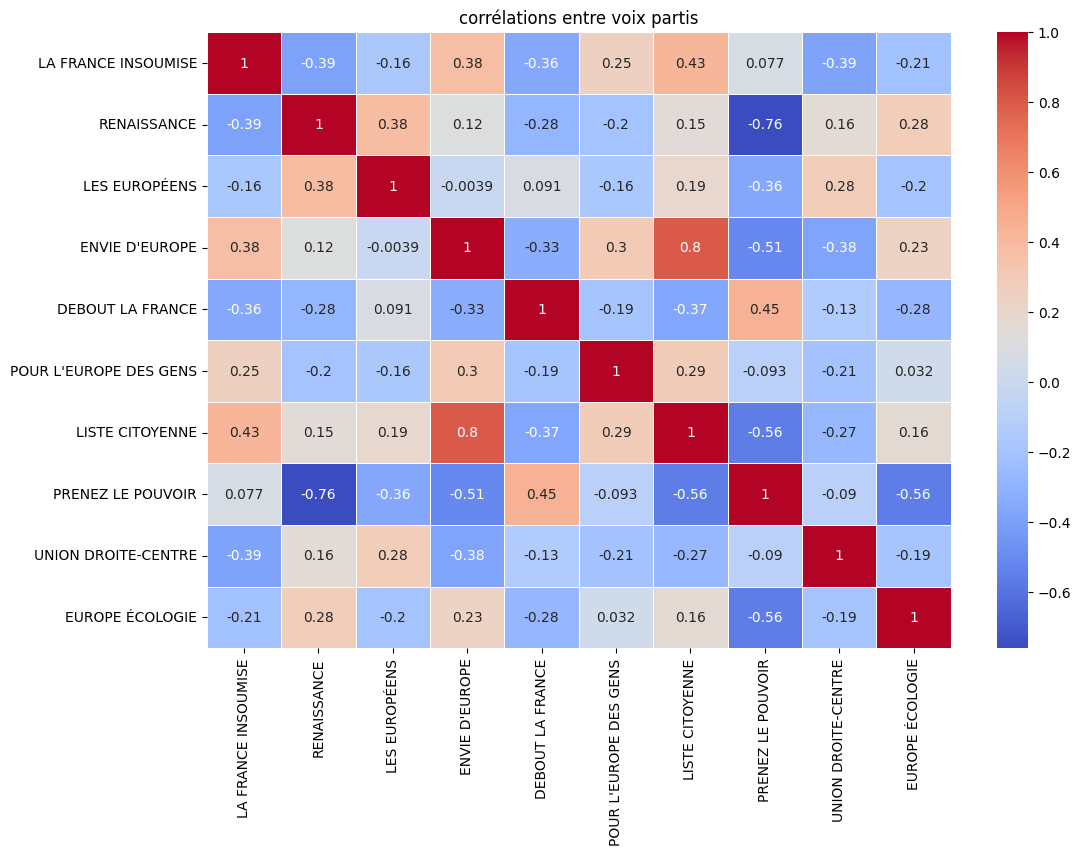

In [ ]:
import seaborn as sns

cor = ee2019_p_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("corrélations entre voix partis")
plt.show()


Ce tableau de corrélation met en lumière une fracture de l'espace politique, structurée autour de trois dynamiques principales : une fusion électorale à gauche, une opposition frontale entre centres et extrêmes, et une proximité des blocs souverainistes.
On observe d'abord une très forte cohésion au sein de la gauche, illustrée par la corrélation quasi parfaite entre Envie d'Europe et Liste Citoyenne (0,8), qui partagent les mêmes bases géographiques avec La France Insoumise.
À l'inverse, le paysage est marqué par des antagonismes radicaux, notamment l'opposition majeure entre Renaissance et Prenez le Pouvoir (−0,76), confirmant que le vote macroniste et le vote RN s'excluent mutuellement sur le territoire.
Enfin, le bloc de droite affiche une cohérence interne logique avec la corrélation positive entre Debout la France et Prenez le Pouvoir (0,45), tandis que ces deux listes s'opposent systématiquement aux autres partis.

In [ ]:
#on va cree un tableau qui reuni les partis par bord politique
gauche= ["LISTE CITOYENNE","LA FRANCE INSOUMISE","POUR L'EUROPE DES GENS","EUROPE ÉCOLOGIE"]
droite= ["UNION DROITE-CENTRE","DEBOUT LA FRANCE","PRENEZ LE POUVOIR"]
centre=["RENAISSANCE","ENVIE D'EUROPE","LES EUROPÉENS"]
G= ee19p[gauche].sum(axis=1)
D=ee19p[droite].sum(axis=1)
C=ee19p[centre].sum(axis=1)
total_pd=G+D+C

bord_pol=pd.DataFrame({
    "Dep":ee19p.iloc[:,0],
    "G": G/total_pd,
    "C": C/total_pd,
    "D": D/total_pd,
})

voix_bpf= bord_pol.iloc[:100,:]
#on reduit a 100 car les autres tableaux n'incluent pas les collectivites d'outre mer


Le regroupage des partis par bord politique a été effectué par ChatGP en prenant en compte le positionnement ideologique auto-déclaré, les familles politiques européennes et les programmes des differents partis.

In [ ]:
voix_bpf

,Dep,G,C,D
0,Ain,0.247537,0.327883,0.424580
1,Aisne,0.201414,0.237194,0.561392
2,Allier,0.260370,0.306293,0.433337
3,Alpes-de-Haute-Provence,0.298026,0.291808,0.410167
4,Hautes-Alpes,0.306485,0.313522,0.379994
...,...,...,...,...
95,Val-d'Oise,0.306659,0.352830,0.340511
96,Guadeloupe,0.322652,0.321985,0.355363
97,Martinique,0.360188,0.343113,0.296700
98,Guyane,0.391365,0.258410,0.350225


In [ ]:
voix_bpf.to_csv("ee_bp19.csv",index=False)

In [ ]:
df1 = pd.read_csv("ee_bp19.csv")

On va maintenant déterminer des clusters de regions et modéliser l'appartenance aux differents bords politique des regions.

On va utiliser la methode du coude pour déterminer combien de groupes (clusters) il est pertinent de former avec k-means sur les variables G, C et D.

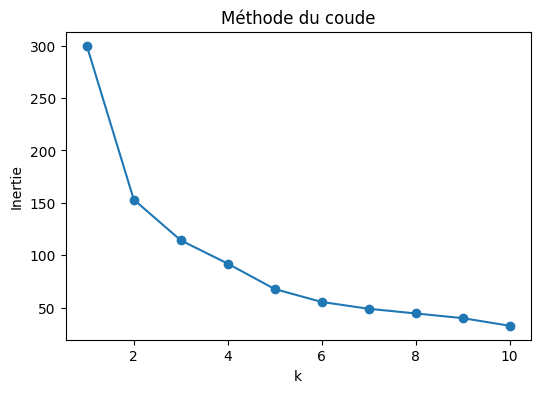

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from fonctions_kmeans import methode_coude
methode_coude(df1, ["G", "C", "D"])

In [ ]:
k =3
X = df1[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
km1 = KMeans(n_clusters=k, random_state=42)
df1["cluster"] = km1.fit_predict(X_scaled)
df1.groupby("cluster")[["G","C","D"]].mean()


,G,C,D
cluster,,,
0,0.302069,0.376043,0.321889
1,0.226460,0.290782,0.482758
2,0.285839,0.306272,0.407889


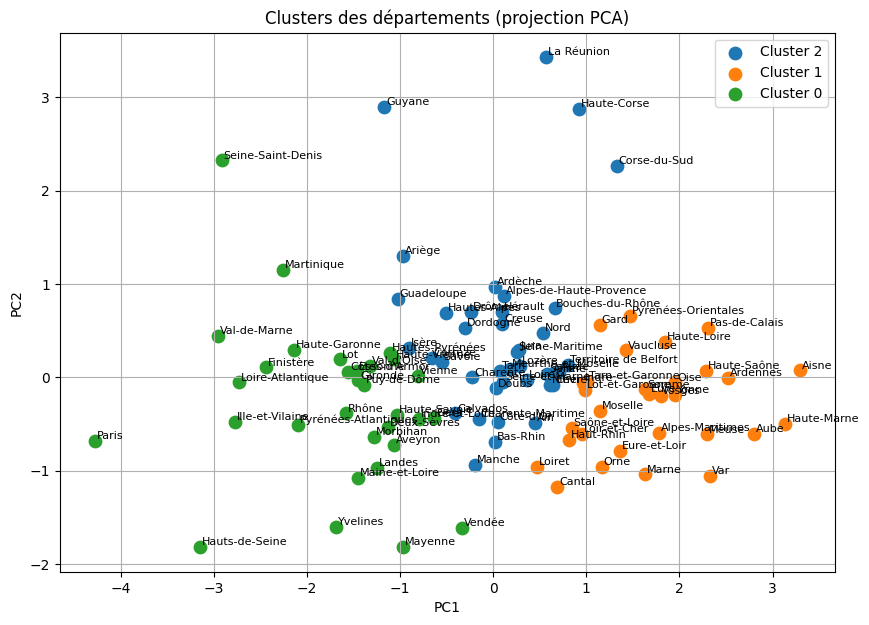

In [ ]:
#  PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df1["PC1"] = X_pca[:, 0]
df1["PC2"] = X_pca[:, 1]

# Visualisation
plt.figure(figsize=(10, 7))
for cluster in df1["cluster"].unique():
    subset = df1[df1["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df1)):
    plt.text(df1["PC1"][i] + 0.02, df1["PC2"][i] + 0.02, df1["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les scores des partis (regroupés en trois blocs : gauche, centre et droite) met en évidence trois profils électoraux distincts.
Le cluster 1 se caractérise par une nette domination du bloc de droite (48 %), ce qui renvoie à des départements plus conservateurs et davantage orientés vers les partis souverainistes ou libéraux-conservateurs.
Le cluster 2 montre également un avantage de la droite (41 %), mais dans une mesure moins marquée, suggérant un profil centre-droit modéré.
Enfin, le cluster 0 présente un équilibre gauche/droite, mais avec une domination du centre (38 %)

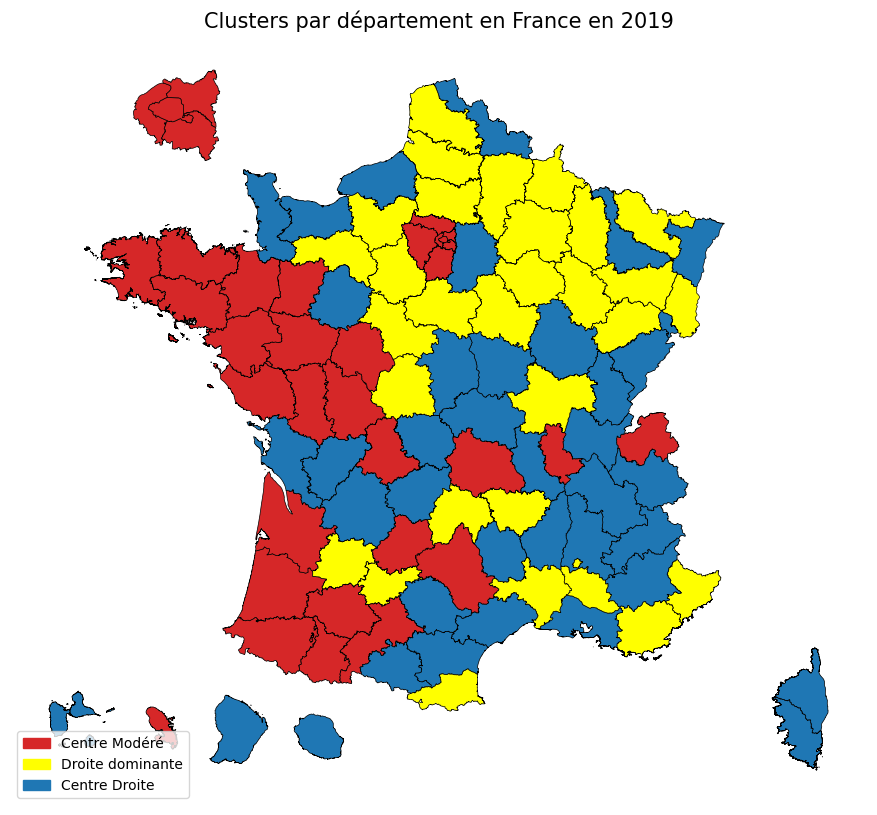

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df1[["Dep", "cluster"]]

departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Centre Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2019', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

On fait la meme chose pour le tableau des élections de 2024

In [ ]:
#nb: il ne s'agit pas exactement du meme code que pour le tableau precendent car les stuctures des tableaux ne sont pas les memes.
ee2024_info = ee2024.iloc[:, :16]
ee2024_parti= ee2024.iloc[:, 16:]

#Sachant qu'il ya des colonnes inutiles, on va juste se concentre sur le nom du parti et les infos sur le nbr de voix
cols_par_parti = 8
cols_utiles = [2,6]

# on selectionne les colonnes correspondantes pour chaque partie
cols_a_garder = []
for i in range(0, 304, cols_par_parti):
    cols_a_garder.extend([i + j for j in cols_utiles])

ee2024_parti_n = ee2024_parti.iloc[:, cols_a_garder]  #152 colonnes

cols_pct = [col for col in ee2024_parti_n.columns if '%' in col ]
for col in cols_pct:
    ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté car ca limite l'analyse et on les transforme en float



/tmp/ipykernel_7160/2285435228.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté car ca limite l'analyse et on les transforme en float
/tmp/ipykernel_7160/2285435228.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté 

In [ ]:
ee2024_p_d, recap_2024= selection_top_partis(ee2024_parti_n)
ee2024_p_df=chang_col(ee2024_p_d)

In [ ]:
ee24p=pd.concat([ee2024_info.iloc[:,1] ,ee2024_p_df], axis=1)
ee24p


,Libellé département,"LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR",LFI - UP,La FRANCE REVIENT,EUROPE ÉCOLOGIE,PARTI ANIMALISTE,BESOIN D'EUROPE,LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE,REVEIL EUR,AR,GAUCHE UNIE
0,Ain,5.98,7.48,36.53,4.91,1.87,14.57,7.57,11.60,2.12,1.66
1,Aisne,4.98,5.29,50.64,2.36,2.41,11.30,6.25,7.78,2.19,2.31
2,Allier,5.32,5.18,36.70,3.07,2.34,13.00,8.88,11.78,3.91,5.10
3,Alpes-de-Haute-Provence,5.77,8.54,36.30,5.27,1.96,12.08,4.18,13.63,3.64,2.95
4,Hautes-Alpes,5.69,7.66,31.06,7.42,1.86,14.06,5.50,15.52,3.33,2.36
...,...,...,...,...,...,...,...,...,...,...,...
102,Wallis et Futuna,9.98,8.61,18.63,3.91,0.86,26.60,10.12,6.07,2.01,2.33
103,Polynésie française,5.04,5.14,20.58,6.55,0.07,41.54,3.09,4.72,1.13,1.00
104,Nouvelle-Calédonie,16.01,4.01,21.71,3.51,0.15,28.64,12.66,4.17,0.91,0.49
105,Saint-Martin/Saint-Barthélemy,9.66,5.02,27.44,4.99,0.25,28.25,4.62,5.90,1.25,0.47


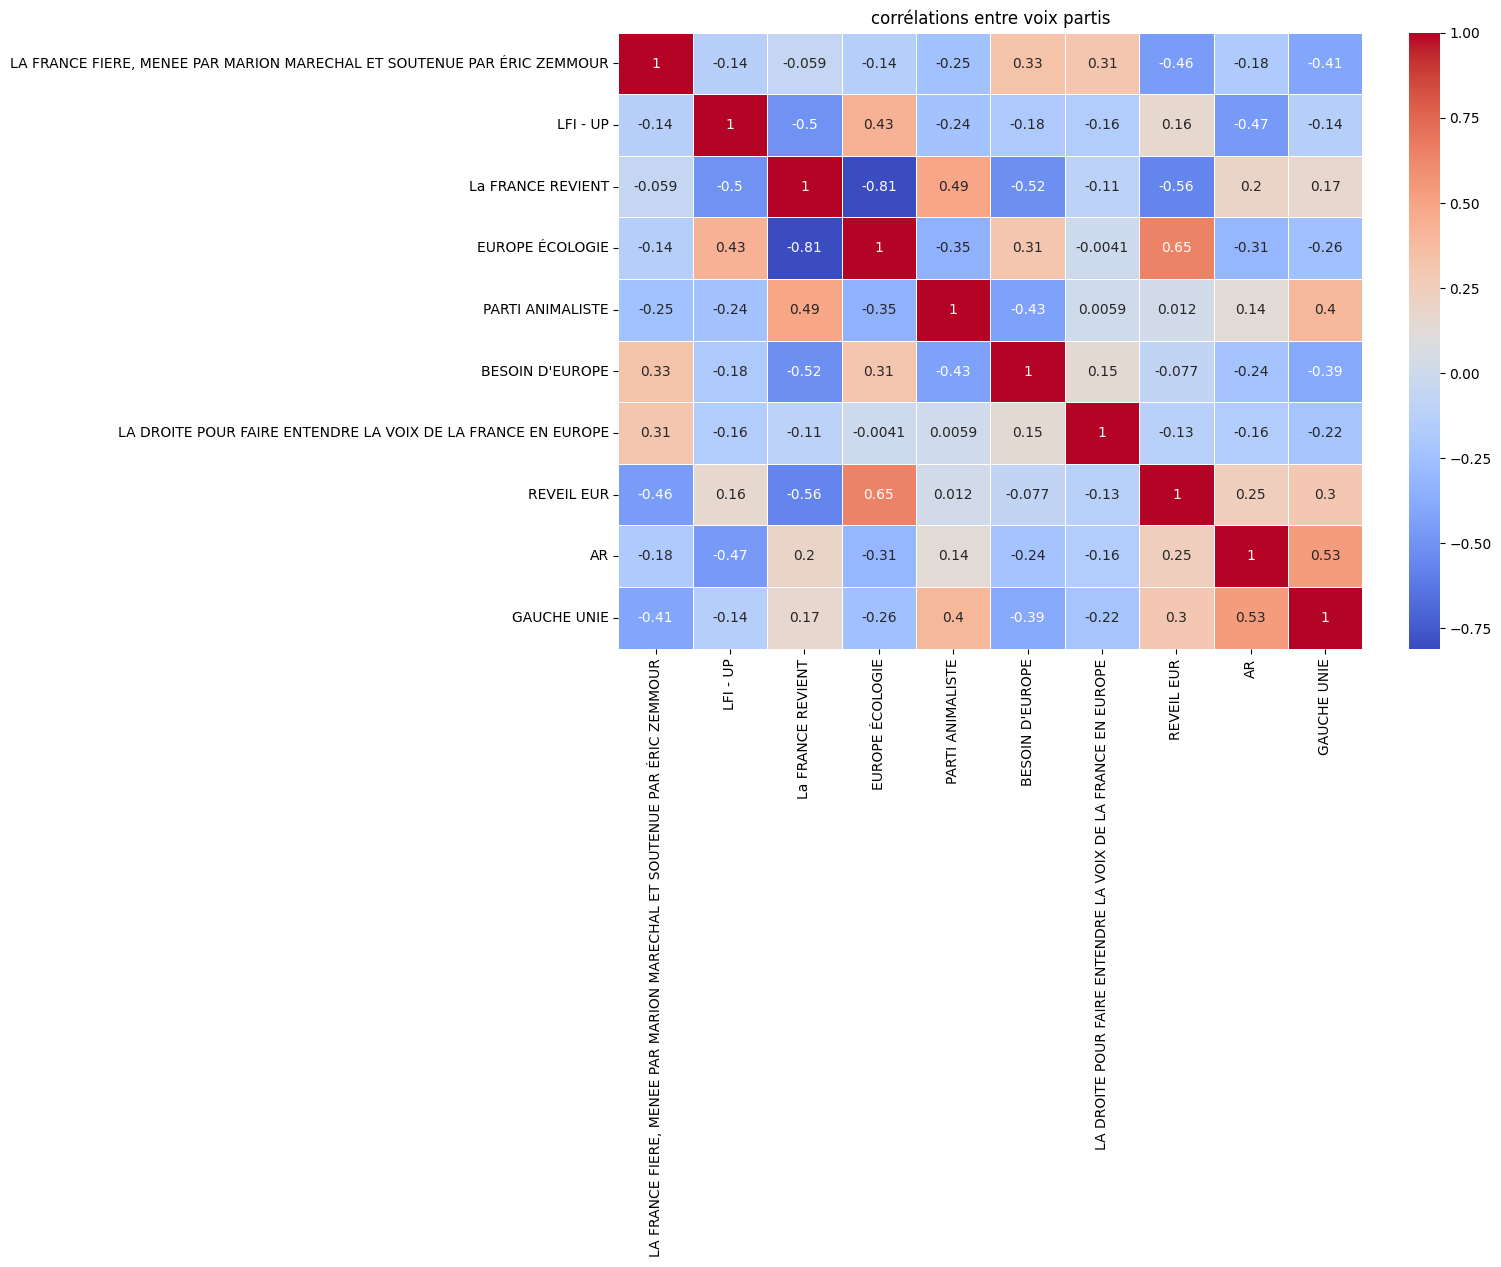

In [ ]:
cor = ee2024_p_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("corrélations entre voix partis")
plt.show()


Le point le plus important est l'opposition totale entre La France Revient (RN) et Europe Écologie (−0,81). Cela signifie que leurs électorats sont géographiquement et socialement à l'opposé.
On remarque aussi qu'il existe une cohérence entre la Gauche Unie et la liste AR (0,53), montrant un bloc de gauche qui reste groupé sur certains territoires.
L'extrême droite (La France Fière) se distingue en ayant quelques points communs avec la droite classique et la majorité présidentielle (Besoin d'Europe), mais il reste très éloigné des votes écologistes ou de la gauche radicale.
Enfin, on remarque que la liste LFI - UP est en opposition avec presque tout le monde sauf les écologiques, notamment avec le RN (−0,50) et la majorité présidentielle (−0,47).

In [ ]:
ee2024_p_df.describe()

,"LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR",LFI - UP,La FRANCE REVIENT,EUROPE ÉCOLOGIE,PARTI ANIMALISTE,BESOIN D'EUROPE,LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE,REVEIL EUR,AR,GAUCHE UNIE
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,5.541308,8.568505,33.148037,4.942243,1.904299,14.688879,7.068037,13.038692,2.961869,2.415607
std,1.557791,4.741415,8.250428,1.743441,0.596507,4.369097,1.927399,3.583462,1.835015,0.845411
min,2.350000,3.740000,8.300000,2.170000,0.030000,6.430000,3.020000,2.530000,0.380000,0.470000
25%,4.850000,5.835000,28.725000,3.710000,1.770000,12.395000,6.025000,10.715000,1.690000,1.935000
50%,5.330000,7.330000,33.670000,4.670000,1.980000,13.780000,6.870000,12.940000,2.490000,2.340000
75%,5.760000,9.120000,37.970000,5.825000,2.260000,15.580000,7.965000,15.440000,3.630000,2.840000
max,16.010000,37.130000,52.420000,12.180000,2.840000,41.540000,13.300000,22.860000,8.390000,5.100000


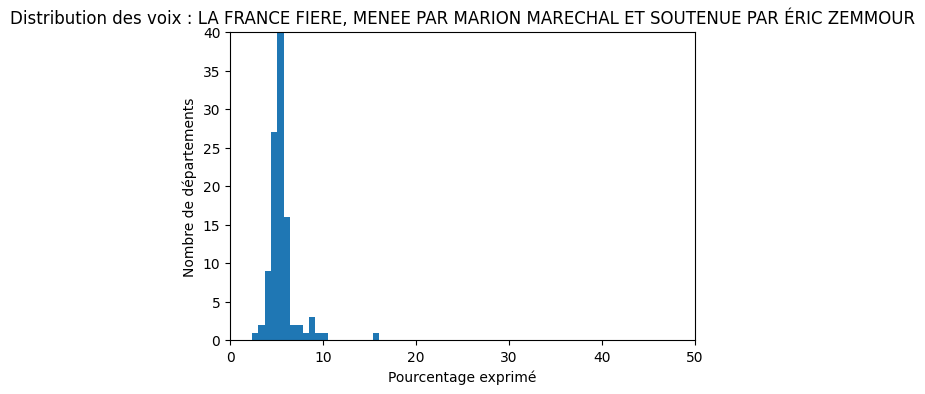

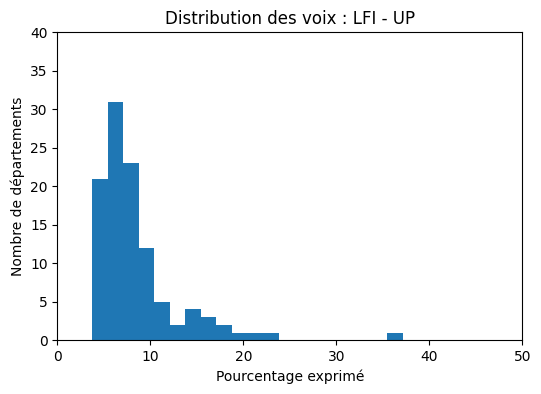

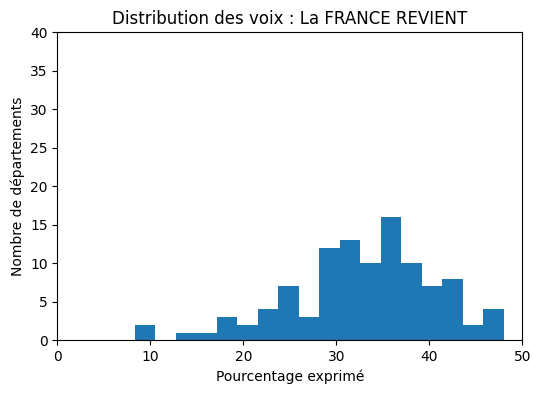

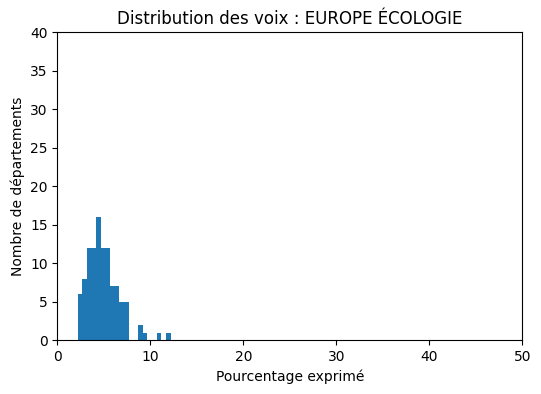

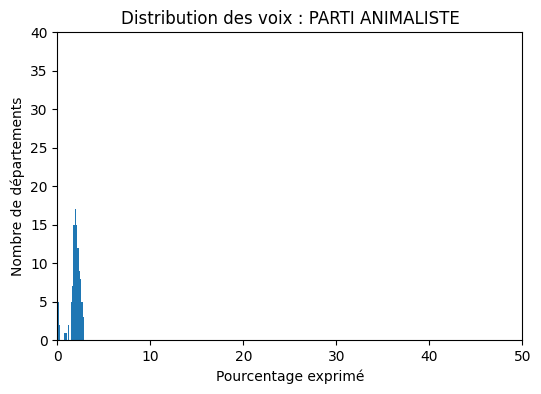

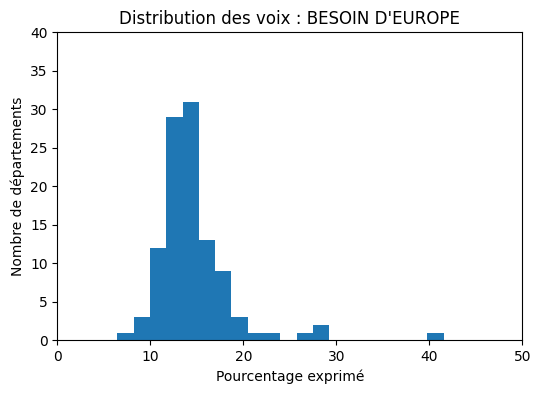

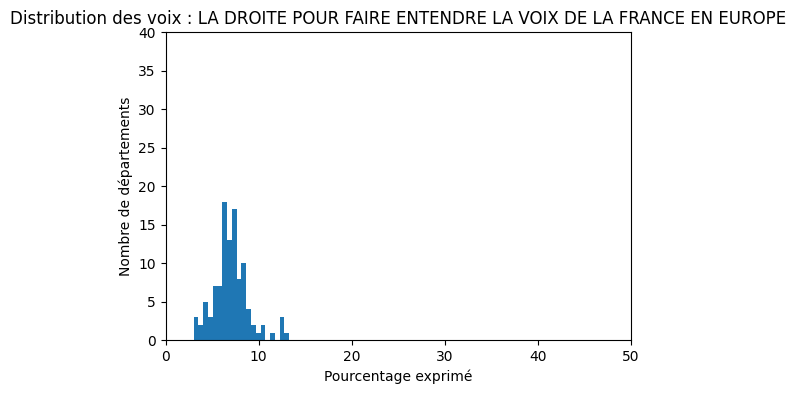

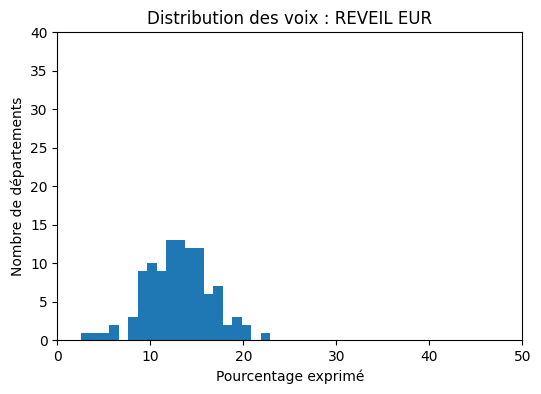

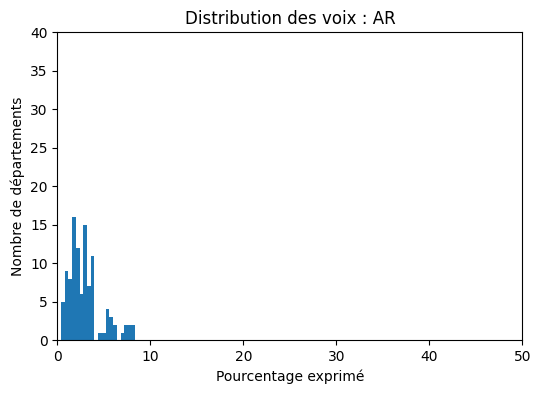

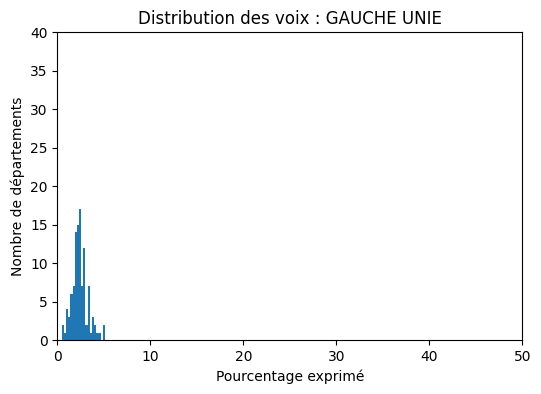

In [ ]:
for col in ee2024_p_df.columns:
    plt.figure(figsize=(6,4))
    plt.xlim(0,50)
    plt.ylim(0,40)
    plt.hist(ee2024_p_df[col], bins=20)
    plt.title(f"Distribution des voix : {col}")
    plt.xlabel("Pourcentage exprimé")
    plt.ylabel("Nombre de départements")
    plt.show()

On constate que 'LA FRANCE REVIENT' domine de loin avec une moyenne de votes de 33% et un histogramme complètement à droite contrairement aux autres partis.

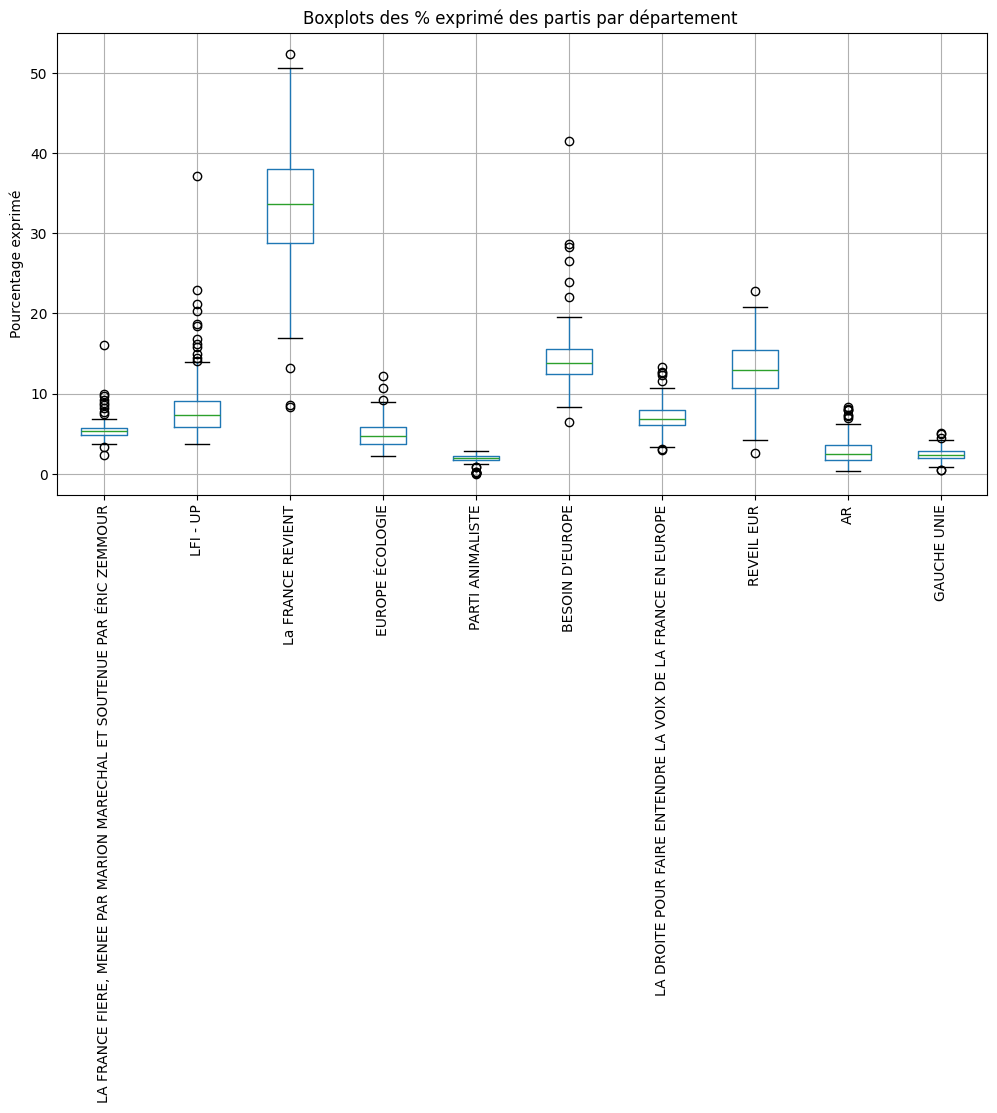

In [ ]:
plt.figure(figsize=(12,6))
ee2024_p_df.boxplot(rot=90)
plt.title("Boxplots des % exprimé des partis par département ")
plt.ylabel("Pourcentage exprimé")
plt.show()

'LA FRANCE REVIENT' domine largement le scrutin avec une médiane s'élevant à environ 34 % et une dispersion très importante, atteignant un pic exceptionnel au-delà de 50 % dans certains départements. En retrait, les listes 'BESOIN D'EUROPE' et 'REVEIL EUR' se disputent la deuxième place avec des médianes proches de 14-15 %, bien que la première affiche une plus grande hétérogénéité territoriale marquée par plusieurs valeurs atypiques élevées. Les autres formations, telles que 'LFI - UP', 'LA FRANCE FIERE' ou 'EUROPE ÉCOLOGIE', se situent dans un mouchoir de poche avec des scores médians oscillant entre 5 % et 8 %, tandis que le 'PARTI ANIMALISTE' et la 'GAUCHE UNIE' ferment la marche avec des résultats très faibles et une quasi-absence de variation géographique.

In [ ]:
gauche2= ["LFI - UP","GAUCHE UNIE","PARTI ANIMALISTE","EUROPE ÉCOLOGIE", "AR"]
droite2= ["La FRANCE REVIENT","LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE","LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR"]
centre2=["BESOIN D'EUROPE","REVEIL EUR"]
G2= ee24p[gauche2].sum(axis=1)
D2=ee24p[droite2].sum(axis=1)
C2=ee24p[centre2].sum(axis=1)
total_pd24=G2+D2+C2

bord_pol24=pd.DataFrame({
    "Dep":ee24p.iloc[:,0],
    "G": G2/total_pd24,
    "C": C2/total_pd24,
    "D": D2/total_pd24,
})

voix_bpf24= bord_pol24.iloc[:100,:]
#on reduit a 100 car les autres tableaux n'incluent pas les collectivites d'outre mer

In [ ]:
voix_bpf24

,Dep,G,C,D
0,Ain,0.191325,0.277548,0.531127
1,Aisne,0.152445,0.199770,0.647786
2,Allier,0.205709,0.260076,0.534215
3,Alpes-de-Haute-Provence,0.237065,0.272583,0.490352
4,Hautes-Alpes,0.239572,0.313148,0.447279
...,...,...,...,...
95,Val-d'Oise,0.346725,0.258215,0.395060
96,Guadeloupe,0.258480,0.322985,0.418535
97,Martinique,0.313748,0.379122,0.307131
98,Guyane,0.351184,0.245806,0.403011


In [ ]:
voix_bpf24.to_csv("ee_bp24.csv",index=False)

Definition des clusters 2024

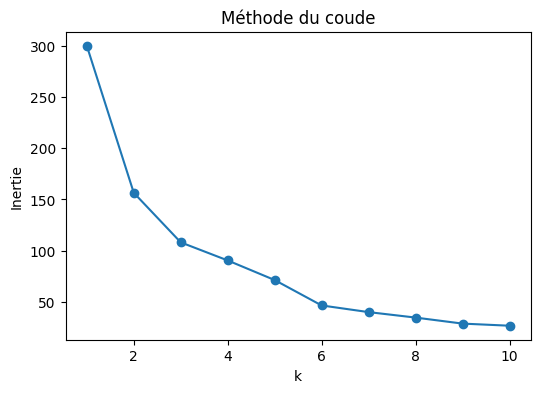

In [ ]:
df2= pd.read_csv("ee_bp24.csv")
methode_coude(df2, ["G", "C", "D"])

In [ ]:
k =3
X = df2[["G", "C", "D"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
km2 = KMeans(n_clusters=k, random_state=42)
df2["cluster"] = km2.fit_predict(X_scaled)
df2.groupby("cluster")[["G","C","D"]].mean()

,G,C,D
cluster,,,
0,0.238710,0.344445,0.416845
1,0.200751,0.260968,0.538281
2,0.380258,0.249729,0.370013


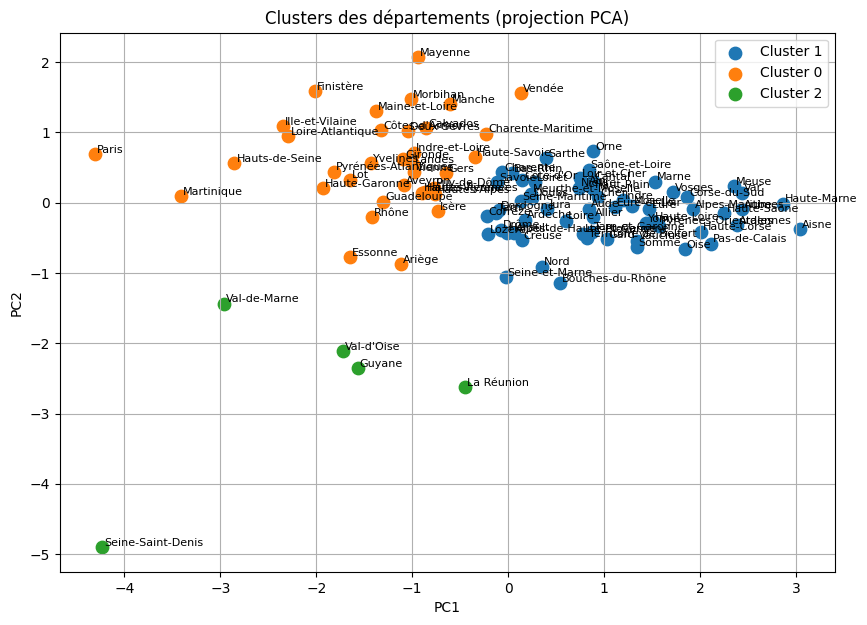

In [ ]:
#PCA pour projeter en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df2["PC1"] = X_pca[:, 0]
df2["PC2"] = X_pca[:, 1]

# Visualisation
plt.figure(figsize=(10, 7))
for cluster in df2["cluster"].unique():
    subset = df2[df2["cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", s=80)

# Ajouter les labels (noms des départements)
for i in range(len(df2)):
    plt.text(df2["PC1"][i] + 0.02, df2["PC2"][i] + 0.02, df2["Dep"][i], fontsize=8)

plt.title("Clusters des départements (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Le clustering réalisé sur les résultats électoraux permet d’identifier trois profils politiques distincts de départements : un cluster dominé par la droite, un cluster marqué par un vote de gauche plus élevé mais avec presence de la droite et un cluster intermédiaire à dominante centriste-droite.

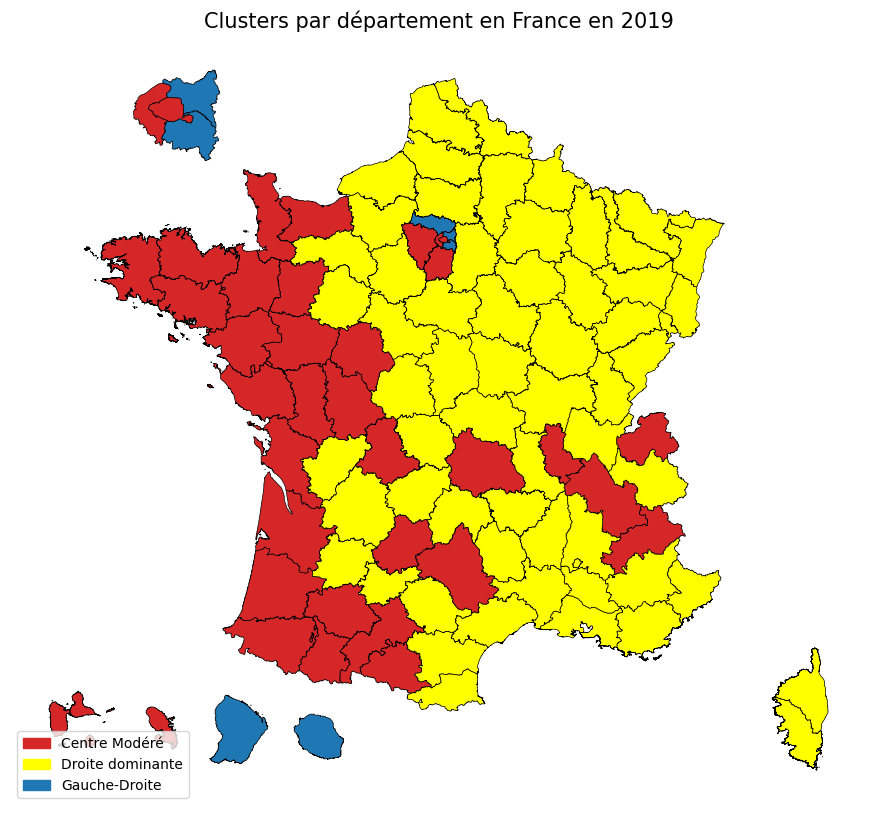

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

# clusters doit avoir une colonne "Dep" avec le nom des départements
df = df2[["Dep", "cluster"]]

departements_lambert93 = departements.to_crs(epsg=2154)
merged_geo_df = departements_lambert93.set_index('LIBELLE_DEPARTEMENT').join(df.set_index('Dep'))

political_colors = {
    "Centre Modéré": '#d62728',  # Red
    "Droite dominante": '#FFFF00',  # Yellow
    "Gauche-Droite": '#1f77b4'   # Blue
}

cmap = mcolors.ListedColormap([political_colors[key] for key in political_colors])

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_geo_df.plot(
    column="cluster",
    cmap=cmap,
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    legend=False

)
ax.set_axis_off()

ax.set_title('Clusters par département en France en 2019', fontsize=15)

legend_patches = [
    mpatches.Patch(color=political_colors[label], label=label)
    for label in political_colors
]
ax.legend(handles=legend_patches, loc='lower left', frameon=True)

plt.show()

Il ya une montée excepetionelle du vote à droite dans l'est et le centre du pays.
Meme si les zones de l'ouest votent toujours au centre, le vote à droite augmente aussi de leur coté.

Pourquoi autant de vote à Droite?
La victoire massive de la droite s'explique par un vote de sanction contre Emmanuel Macron et une forte inquiétude sur le pouvoir d'achat. Le RN a réussi à sortir de ses zones habituelles pour convaincre de nouveaux électeurs comme les retraités et les cadres, tout en captant le sentiment d'abandon des habitants des zones rurales.

# 2/ Modélisation des données de chômage de 2019 et 2024


In [ ]:
!pip install cartiflette
from geo_utils import load_and_reproject_departements
departements_lambert93 = load_and_reproject_departements()

In [ ]:
import pandas as pd
# URL directe du fichier contenant les données de taux de chômage.
url = "https://www.data.gouv.fr/api/1/datasets/r/500d1954-9849-479b-9aac-85435c6d422f"
# Lecture du fichier Excel avec un encodage adapté.
# Les données sont lues à partir de la feuille 'Moyenne annuelle', avec un en-tête à la ligne 5 et des colonnes spécifiques.
df5 = pd.read_excel(url, engine='openpyxl', header = 5, usecols=[0,1,7,10,12],
 nrows=101, sheet_name="Moyenne annuelle").dropna()
# Affiche le DataFrame pour vérification.
df5

Préparation du Dataframe pour la fusion avec la carte (Merging)

Pour préparer le DataFrame df5 en vue de sa fusion, je vais d'abord convertir la colonne 'Département' en type chaîne de caractères pour assurer la cohérence des types de données, puis filtrer les lignes non-départementales, et enfin afficher les premières lignes et les informations du DataFrame nettoyé pour vérifier les modifications.


In [ ]:
# Convertit la colonne 'Département' en type chaîne de caractères pour assurer la cohérence des types de données.
df5['Département'] = df5['Département'].astype(str)
# Filtre les lignes non-départementales (France métropolitaine 'M' et départements d'outre-mer) du DataFrame df5.
df5 = df5[~df5['Département'].isin(['M', '971', '972', '973', '974'])]
# Affiche les premières lignes du DataFrame nettoyé.
print(df5.head())
# Affiche les informations sur le DataFrame nettoyé (types de données, valeurs non nulles, etc.).
print(df5.info())

La prochaine étape logique est de fusionner ce df5 DataFrame préparé avec le departements_lambert93 GeoDataFrame pour combiner les données géographiques avec les taux de chômage, ce qui est essentiel pour créer les choropleth maps.

In [ ]:
# Fusionne les données géographiques des départements (`departements_lambert93`) avec les données de taux de chômage (`df5`).
# La fusion est réalisée sur la colonne 'INSEE_DEP' du GeoDataFrame et 'Département' du DataFrame df5.
# Un 'left merge' est utilisé pour conserver toutes les entités du GeoDataFrame.
merged_data_unemployment = departements_lambert93.merge(df5, left_on='INSEE_DEP', right_on='Département', how='left')

# Affiche les premières lignes du DataFrame fusionné pour vérification.
print("\nFirst few rows of merged_data_unemployment:")
print(merged_data_unemployment.head())
# Affiche les informations sur le DataFrame fusionné (types de données, valeurs non nulles, etc.).
print("\nInfo of merged_data_unemployment:")
print(merged_data_unemployment.info())

Les données ont été fusionnées avec succès. La prochaine étape consiste à visualiser les taux de chômage pour 2019 à l'aide d'une carte choroplèthe.

In [1]:


# Convertit tous les noms de colonnes dans merged_data_unemployment en type chaîne de caractères et supprime tout espace blanc,
# garantissant ainsi un accès cohérent aux colonnes basé sur des chaînes de caractères pour le traçage.
merged_data_unemployment.columns = [str(col).strip() for col in merged_data_unemployment.columns]
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

merged_data_unemployment.plot(column='2019', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'label': "Taux de chômage en 2019 (%)", 'orientation': "vertical"})
ax.set_title("Taux de chômage par Département en France (2019)", fontsize=15)
ax.set_axis_off()
plt.show()

NameError: name 'merged_data_unemployment' is not defined

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# Trace la carte choroplèthe en utilisant la colonne '2024' pour la couleur.

merged_data_unemployment.plot(column='2024', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'label': "Taux de chômage en 2024 (%)", 'orientation': "vertical"})
ax.set_title("Taux de chômage par Département en France (2024)", fontsize=15)
ax.set_axis_off()
plt.show()

## K-means

### Méthode du coude

Pour interpréter ce graphique et trouver le nombre optimal de clusters k, on cherche le point où la courbe forme un "coude" prononcé. C'est le point après lequel la diminution du WCSS (la somme des carrés intra-cluster) commence à ralentir significativement. Cela indique que l'ajout d'un cluster supplémentaire n'apporte plus beaucoup de gain en termes de réduction de la variance intra-cluster.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcule la somme des carrés intra-cluster (WCSS) pour différents nombres de clusters
wcss = []
k_range = range(1, 11) # Teste k de 1 à 10

for k in k_range:
    # Initialise et entraîne le modèle KMeans pour chaque valeur de k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    # Ajoute le WCSS (inertia_) à la liste
    wcss.append(kmeans.inertia_)

# graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour la détermination du nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS (Somme des carrés intra-cluster)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Dans ce cas, 4 clusters apparaît comme un bon candidat pour le nombre optimal de clusters, car c'est là que le bénéfice d'ajouter un cluster supplémentaire commence à devenir marginal.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélectionne les colonnes pertinentes pour le clustering (taux de chômage pour 2019, 2022, 2024).
unemployment_cols = ['2019', '2022', '2024']
clustering_data = merged_data_unemployment[unemployment_cols].copy()

# Gère les valeurs manquantes en les remplaçant par la moyenne de chaque colonne.
for col in unemployment_cols:
    if clustering_data[col].isnull().any():
        clustering_data[col] = clustering_data[col].fillna(clustering_data[col].mean())

# Standardise les données pour que chaque variable ait une moyenne de 0 et un écart-type de 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_data)

# Applique l'algorithme de clustering KMeans.
# Nous assumons 4 clusters comme point de départ (basé sur l'analyse de la méthode du coude).
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Prédit les clusters pour chaque département.
clusters = kmeans.fit_predict(X_scaled)
# Ajoute la colonne des clusters au DataFrame fusionné.
merged_data_unemployment['cluster'] = clusters

print("Cluster distribution:")
print(merged_data_unemployment['cluster'].value_counts())
print("\nFirst few rows with cluster assignments:")
print(merged_data_unemployment[['LIBELLE_DEPARTEMENT', '2019', '2022', '2024', 'cluster']].head())

Cluster distribution:
cluster
0    50
3    28
2    15
1    12
Name: count, dtype: int64

First few rows with cluster assignments:
  LIBELLE_DEPARTEMENT   2019   2022   2024  cluster
0         Haute-Loire  6.650  5.625  5.600        3
1     Hautes-Pyrénées  9.375  7.975  7.700        2
2           Finistère  7.300  6.850  6.200        0
3       Côtes-d'Armor  7.425  6.400  6.225        0
4               Isère  6.900  5.900  6.000        3


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applique la PCA (Analyse en Composantes Principales) pour projeter les données dans un espace 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajoute les deux premières composantes principales (PC1 et PC2) au DataFrame fusionné
merged_data_unemployment["PC1"] = X_pca[:, 0]
merged_data_unemployment["PC2"] = X_pca[:, 1]

# Visualisation des clusters dans l'espace PCA
plt.figure(figsize=(12, 9))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for cluster_id in sorted(merged_data_unemployment["cluster"].unique()):
    subset = merged_data_unemployment[merged_data_unemployment["cluster"] == cluster_id]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster_id}", s=80, alpha=0.7, color=colors[cluster_id % len(colors)])

for i in range(len(merged_data_unemployment)):
    plt.text(merged_data_unemployment["PC1"].iloc[i] + 0.02, merged_data_unemployment["PC2"].iloc[i] + 0.02,
             merged_data_unemployment["INSEE_DEP"].iloc[i], fontsize=7)

plt.title("Clusters des départements basés sur le taux de chômage (projection PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

### Interprétation des Composantes Principales (PC1 et PC2)

Sur le graphique de la PCA que nous venons de visualiser, chaque département est projeté sur deux axes principaux, PC1 et PC2, qui sont des combinaisons linéaires des taux de chômage des années 2019, 2022 et 2024. Ces composantes ont été choisies pour maximiser la variance des données :

*   PC1  :
    *   C'est l'axe qui capture la plus grande part de la variance totale des données. Dans notre contexte, PC1 représente très probablement le niveau général de chômage des départements sur la période 2019-2024.
    *   Les départements situés à l'extrémité gauche de l'axe PC1 ont tendance à avoir des taux de chômage globalement faibles sur les trois années.
    *   Les départements situés à l'extrémité droite de l'axe PC1 ont tendance à avoir des taux de chômage globalement élevés sur les trois années.

*   PC2  :
    *   C'est l'axe qui capture la deuxième plus grande part de la variance, indépendamment de PC1 (car PC1 et PC2 sont orthogonales).
    *   PC2 représente souvent la dynamique ou l'évolution des taux de chômage entre les années. Par exemple, il pourrait différencier les départements dont le chômage a fortement baissé de ceux où il est resté stable ou a augmenté, indépendamment de leur niveau général.
    *   Les départements situés en haut ou en bas de l'axe PC2 présentent des schémas d'évolution distincts par rapport à ceux au centre.

Ensemble, PC1 et PC2 nous permettent de visualiser les départements et leurs clusters dans un espace simplifié, où la distance entre les points reflète la similarité de leurs profils de chômage sur la période.

In [ ]:
# Calculer les moyennes des taux de chômage pour chaque cluster et chaque année
cluster_profiles = merged_data_unemployment.groupby('cluster')[['2019', '2022', '2024']].mean()

print("Profils moyens des clusters (taux de chômage) :")
print(cluster_profiles)

# Visualisation des profils de clusters
cluster_profiles.T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Évolution moyenne du taux de chômage par Cluster (2019-2024)')
plt.xlabel('Année')
plt.ylabel('Taux de chômage moyen (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Caractérisation des Clusters de Départements (Taux de Chômage 2019-2024)

| Cluster | Taux de Chômage Moyen (2019) | Taux de Chômage Moyen (2022) | Taux de Chômage Moyen (2024) | Tendance Générale & Caractérisation |
|---------|------------------------------|------------------------------|------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **0**   | 7.92%                        | 6.81%                        | 6.91%                        | **Intermédiaire en Amélioration** : Taux moyens, nette amélioration entre 2019 et 2022, puis légère remontée ou stabilisation. |
| **1**   | 11.29%                       | 9.95%                        | 10.14%                       | **Fortement Impacté** : Taux les plus élevés de tous les clusters, avec une légère hausse en 2024, indiquant des difficultés structurelles. |
| **2**   | 9.39%                        | 8.02%                        | 8.06%                        | **Élevé mais Décroissant** : Taux élevés mais inférieurs au Cluster 1, avec une réduction significative entre 2019 et 2022, puis une stabilisation à un niveau encore relativement haut. |
| **3**   | 6.42%                        | 5.56%                        | 5.66%                        | **Très Faible et Stable** : Taux les plus bas, très stables sur la période, avec une performance remarquable sur le marché du travail. |


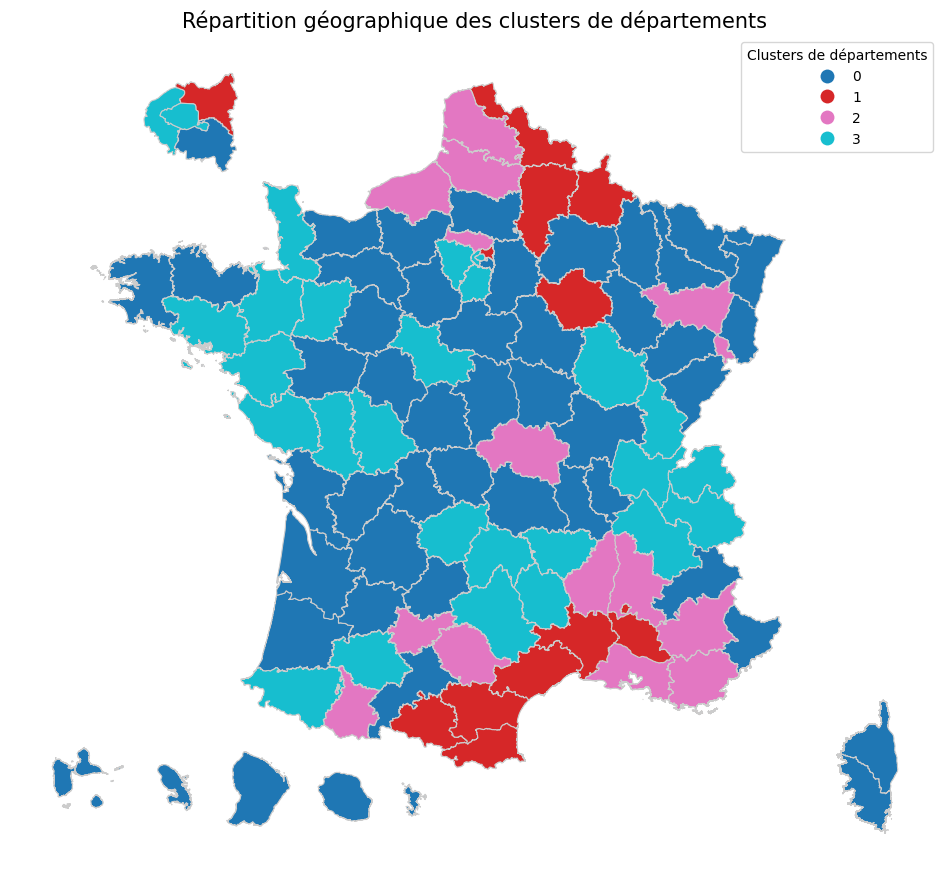

In [ ]:
merged_data_unemployment['cluster'] = merged_data_unemployment['cluster'].astype('category')
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Trace la carte choroplèthe en utilisant la colonne 'cluster' pour la couleur.
merged_data_unemployment.plot(column='cluster', cmap='tab10', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                              legend_kwds={'title': "Clusters de départements"} )
ax.set_title("Répartition géographique des clusters de départements", fontsize=15)
ax.set_axis_off()
plt.show()

# 3/ Modélisation par une regression linéaire

### Fusion des bases de données `df_regressions` et `ee_bp19`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df1 = pd.read_csv("df_regressions.csv")
df2 = pd.read_csv("ee_bp19.csv")
# Fusion des deux dataframes
df = df1.merge(df2, on="Dep")

In [ ]:
df.head()

,Dep,D9/D1,Rev_median,Ndip25_34,intens_pauvr,chom19,chom24,Dem_empl15_64,tauxpauvrete,G,C,D
0,Ain,3.5,24810.0,11.5,20.4,6.050,5.600,10.3,10.8,0.247537,0.327883,0.424580
1,Aisne,3.1,20920.0,17.6,20.1,11.800,10.500,15.8,18.8,0.201414,0.237194,0.561392
2,Allier,3.0,21500.0,14.8,20.1,9.050,7.925,13.7,16.2,0.260370,0.306293,0.433337
3,Alpes-de-Haute-Provence,3.2,21790.0,12.7,20.5,10.075,7.925,16.0,17.1,0.298026,0.291808,0.410167
4,Hautes-Alpes,3.0,22010.0,9.7,19.9,7.925,6.225,15.8,14.7,0.306485,0.313522,0.379994


### 3.1) Régression linéaire pour 2019

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
# On écrit une fonction qui va réaliser la régression linéaire

def reglin(df, var):
    
    # variables explicatives (X) et cibles (Y)
    features_cols = ['D9/D1', 'Rev_median', 'Ndip25_34', var, 'Dem_empl15_64', 'tauxpauvrete']

    X = df[features_cols]

    # On standardise pour comparer l'importance des coefficients
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=features_cols)

    X_final = sm.add_constant(X_scaled)

    # --- RÉGRESSIONS ET AFFICHAGE COMPLET ---
    partis = {'GAUCHE': 'G', 'CENTRE': 'C', 'DROITE': 'D'}

    resume_significativite = pd.DataFrame(index=features_cols)

    print(" ANALYSE ÉCONOMÉTRIQUE COMPLÈTE ".center(80, "="))

    for nom, col in partis.items():
        y = df[col]
        
        # Ajustement du modèle
        model = sm.OLS(y, X_final)
        
        try:
            results = model.fit(cov_type="HC1") 
            
            print(f"\n\n{'#'*30}")
            print(f" RÉSULTATS POUR : {nom} ")
            print(f"{'#'*30}")
            
            # On affiche le résumé complet
            print(results.summary())
            
            # On stocke les p-valeurs pour une vue d'ensemble à la fin
            resume_significativite[f'P-val {nom}'] = results.pvalues.drop('const')
            
        except Exception as e:
            print(f"\nErreur sur {nom} (probablement pas assez de données dans l'échantillon test) : {e}")

    # --- Variables explicatives et P_valeurs ---
    print("\n\n" + "="*80)
    print(" RÉSUMÉ DES P-VALEURS (Seuil : 5%) ")
    print("="*80)
    print(resume_significativite.round(4))



In [ ]:
# On lance la regression
reglin(df, 'chom19')

======================== ANALYSE ÉCONOMÉTRIQUE COMPLÈTE ========================


##############################
 RÉSULTATS POUR : GAUCHE 
##############################
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     16.63
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.24e-12
Time:                        12:27:18   Log-Likelihood:                 191.63
No. Observations:                  93   AIC:                            -369.3
Df Residuals:                      86   BIC:                            -351.5
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                    coef    std err    

##### Vérification modèle de régression linéaire

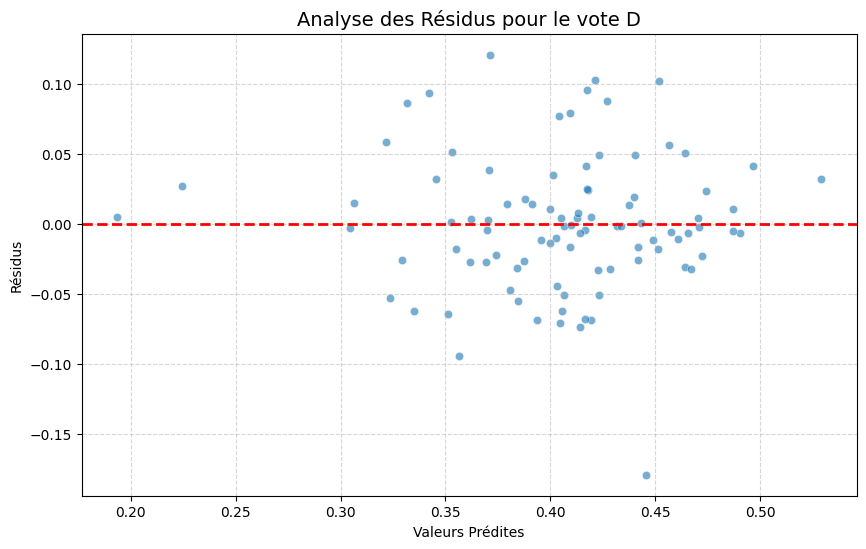

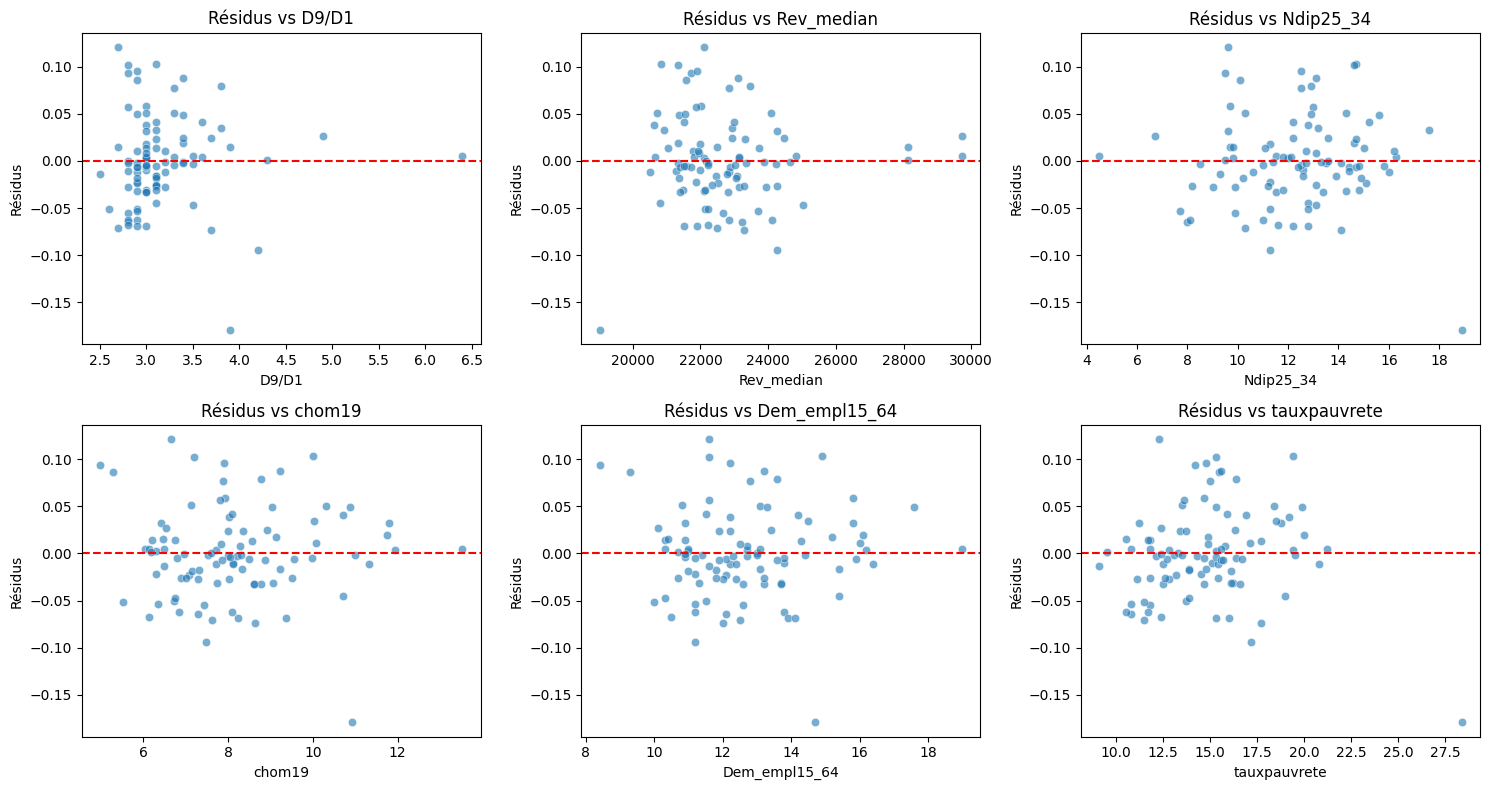

--- Corrélation entre les résidus et les variables explicatives (D) ---
D9/D1           -9.163010e-16
Rev_median      -4.223472e-16
Ndip25_34       -2.062336e-16
chom19          -7.283506e-16
Dem_empl15_64   -7.865025e-16
tauxpauvrete    -4.963905e-16
dtype: float64


In [ ]:

# Remplacer 'target_col' par G ou C pour visualiser pour les autres partis

target_col = 'D' 
y = df[target_col]

model = sm.OLS(y, X_final)
try:
    results = model.fit(cov_type='HC1')
    
    # On récupère les résidus et les prédictions
    residus = results.resid
    predictions = results.fittedvalues
    
    # ==============================================================================
    # RÉSIDUS vs VALEURS PRÉDITES 
    # ==============================================================================
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residus, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', lw=2) # Ligne zéro
    plt.title(f'Analyse des Résidus pour le vote {target_col}', fontsize=14)
    plt.xlabel('Valeurs Prédites')
    plt.ylabel('Résidus')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # ==============================================================================
    # RÉSIDUS vs VARIABLES EXPLICATIVES
    # ==============================================================================
    
    # On selectionne les variables principales (excluant la constante)
    vars_to_check = features_cols 
    
    # Graphique
    n_cols = 3
    n_rows = (len(vars_to_check) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten() # Aplatir pour itérer facilement

    for i, col_name in enumerate(vars_to_check):
        sns.scatterplot(x=df[col_name], y=residus, ax=axes[i], alpha=0.6)
        axes[i].axhline(0, color='red', linestyle='--', lw=1.5)
        axes[i].set_title(f'Résidus vs {col_name}')
        axes[i].set_ylabel('Résidus')
        axes[i].set_xlabel(col_name)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # ==============================================================================
    # CORRÉLATION
    # ==============================================================================
    print(f"--- Corrélation entre les résidus et les variables explicatives ({target_col}) ---")
    correlation_check = df[features_cols].apply(lambda x: x.corr(residus))
    print(correlation_check)

except Exception as e:
    print(f"Erreur (probablement due au manque de données dans l'échantillon test) : {e}")

    On constate que les corrélations sont proches de 0.

### Résumé global de l'analyse pour 2019

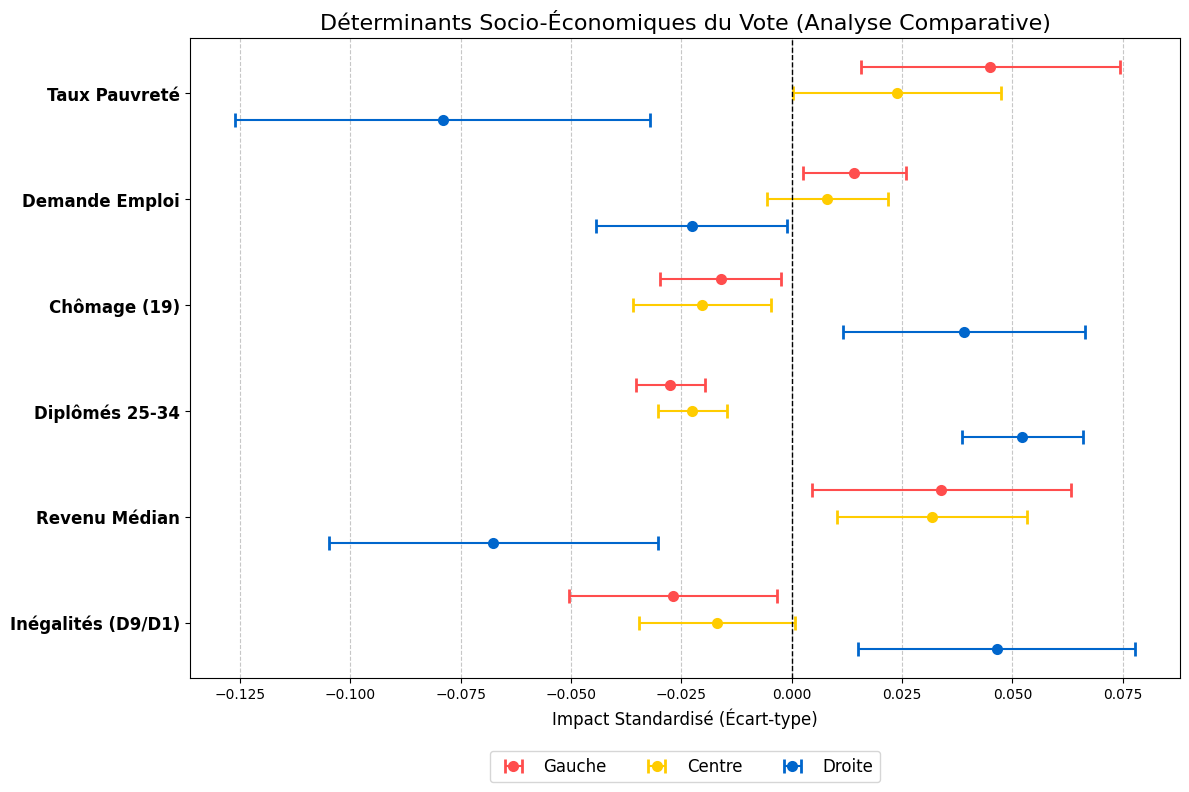

In [ ]:
# On copie les valeurs exactes (Coefs et erreurs) de la régression précédente

data_viz = {
    'Variable': ['Inégalités (D9/D1)', 'Revenu Médian', 'Diplômés 25-34', 
                 'Chômage (19)', 'Demande Emploi', 'Taux Pauvreté'],
    
    # GAUCHE 
    'G_coef': [-0.0269, 0.0339, -0.0275, -0.0161, 0.0142, 0.0450],
    'G_err':  [0.012,   0.015,  0.004,   0.007,   0.006,  0.015],
    
    # CENTRE 
    'C_coef': [-0.0169, 0.0317, -0.0225, -0.0204, 0.0080, 0.0239],
    'C_err':  [0.009,   0.011,  0.004,   0.008,   0.007,  0.012],
    
    # DROITE 
    'D_coef': [0.0464, -0.0676, 0.0522, 0.0390, -0.0227, -0.0791],
    'D_err':  [0.016,   0.019,  0.007,   0.014,   0.011,   0.024]
}

df_viz = pd.DataFrame(data_viz)

# Calcul des intervalles de confiance à 95% (1.96 * StdErr)
df_viz['G_ci'] = df_viz['G_err'] * 1.96
df_viz['C_ci'] = df_viz['C_err'] * 1.96
df_viz['D_ci'] = df_viz['D_err'] * 1.96

# Graphique
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(df_viz))
height = 0.25  # Épaisseur des barres

colors = {'G': '#ff4d4d', 'C': '#ffcc00', 'D': '#0066cc'} # Rouge, Jaune, Bleu

# On visualise chaque parti

# GAUCHE
ax.errorbar(df_viz['G_coef'], y_pos + height, xerr=df_viz['G_ci'], 
            fmt='o', color=colors['G'], label='Gauche', capsize=5, markeredgewidth=2)

# CENTRE
ax.errorbar(df_viz['C_coef'], y_pos, xerr=df_viz['C_ci'], 
            fmt='o', color=colors['C'], label='Centre', capsize=5, markeredgewidth=2)

# DROITE
ax.errorbar(df_viz['D_coef'], y_pos - height, xerr=df_viz['D_ci'], 
            fmt='o', color=colors['D'], label='Droite', capsize=5, markeredgewidth=2)

ax.set_yticks(y_pos)
ax.set_yticklabels(df_viz['Variable'], fontsize=12, fontweight='bold')
ax.axvline(0, color='black', linestyle='--', linewidth=1) # Ligne zéro
ax.set_xlabel('Impact Standardisé (Écart-type)', fontsize=12)
ax.set_title('Déterminants Socio-Économiques du Vote (Analyse Comparative)', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

L'analyse des données nous montre clairement que le paysage politique français est coupé en trois, et que chaque camp correspond à une réalité économique bien précise. Ce n'est plus seulement une question d'idées : on voit que la situation financière et sociale du département joue un rôle majeur dans la façon dont les gens votent.

Le vote du Centre est sans doute le plus simple à comprendre : c'est le vote de la stabilité et de la réussite économique. Les chiffres sont très clairs là-dessus, puisque ce bloc réalise ses meilleurs scores dans les départements où le niveau de vie est élevé. À l'inverse, c'est un vote qui ne supporte pas la crise : dès que le chômage augmente, le score du Centre s'effondre. C'est donc le choix privilégié de la "France qui va bien", celle qui a intérêt à ce que le système ne change pas trop.

Pour la Droite, c'est exactement l'inverse. Ce vote se nourrit des fractures sociales. Il est particulièrement fort là où il y a du chômage et là où les inégalités de revenus sont les plus criantes. C'est clairement l'expression d'une colère ou d'un sentiment de déclassement. Il y a tout de même une nuance importante à saisir : la Droite ne fait pas le plein dans les zones de grande pauvreté. Elle semble plutôt attirer ceux qui travaillent mais qui rament, ou qui ont peur de descendre l'échelle sociale, tout en rejetant ce qu'ils perçoivent comme de l'assistanat.

Enfin, la Gauche conserve son rôle historique de protecteur. Son moteur principal reste la pauvreté : plus un département est en difficulté, plus il vote à Gauche pour chercher du soutien public. Son grand problème, c'est qu'elle ne capte plus le "vote chômage", qui est parti à Droite. On remarque aussi quelque chose d'intéressant : une fois qu'on met la pauvreté de côté, on voit que des gens avec de bons revenus continuent de voter à Gauche, ce qui correspond probablement aux citadins et aux classes moyennes éduquées des grandes villes.

### 3.2) Analyse pour l'année 2024

### Fusion des bases de données `df_regressions` et `ee_bp24`

In [ ]:
df1 = pd.read_csv("df_regressions.csv").drop(columns='chom19') # On supprime le chomage de 2019
df2 = pd.read_csv("ee_bp24.csv")
# Fusion des deux dataframes
df = df1.merge(df2, on="Dep")

In [ ]:
df.head()

,Dep,D9/D1,Rev_median,Ndip25_34,intens_pauvr,chom24,Dem_empl15_64,tauxpauvrete,G,C,D
0,Ain,3.5,24810.0,11.5,20.4,5.600,10.3,10.8,0.191325,0.277548,0.531127
1,Aisne,3.1,20920.0,17.6,20.1,10.500,15.8,18.8,0.152445,0.199770,0.647786
2,Allier,3.0,21500.0,14.8,20.1,7.925,13.7,16.2,0.205709,0.260076,0.534215
3,Alpes-de-Haute-Provence,3.2,21790.0,12.7,20.5,7.925,16.0,17.1,0.237065,0.272583,0.490352
4,Hautes-Alpes,3.0,22010.0,9.7,19.9,6.225,15.8,14.7,0.239572,0.313148,0.447279


#### Régression linéaire 

In [ ]:
reglin(df, 'chom24')

======================== ANALYSE ÉCONOMÉTRIQUE COMPLÈTE ========================


##############################
 RÉSULTATS POUR : GAUCHE 
##############################
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     11.62
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.71e-09
Time:                        12:27:20   Log-Likelihood:                 175.11
No. Observations:                  93   AIC:                            -336.2
Df Residuals:                      86   BIC:                            -318.5
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                    coef    std err    

### Résumé graphique

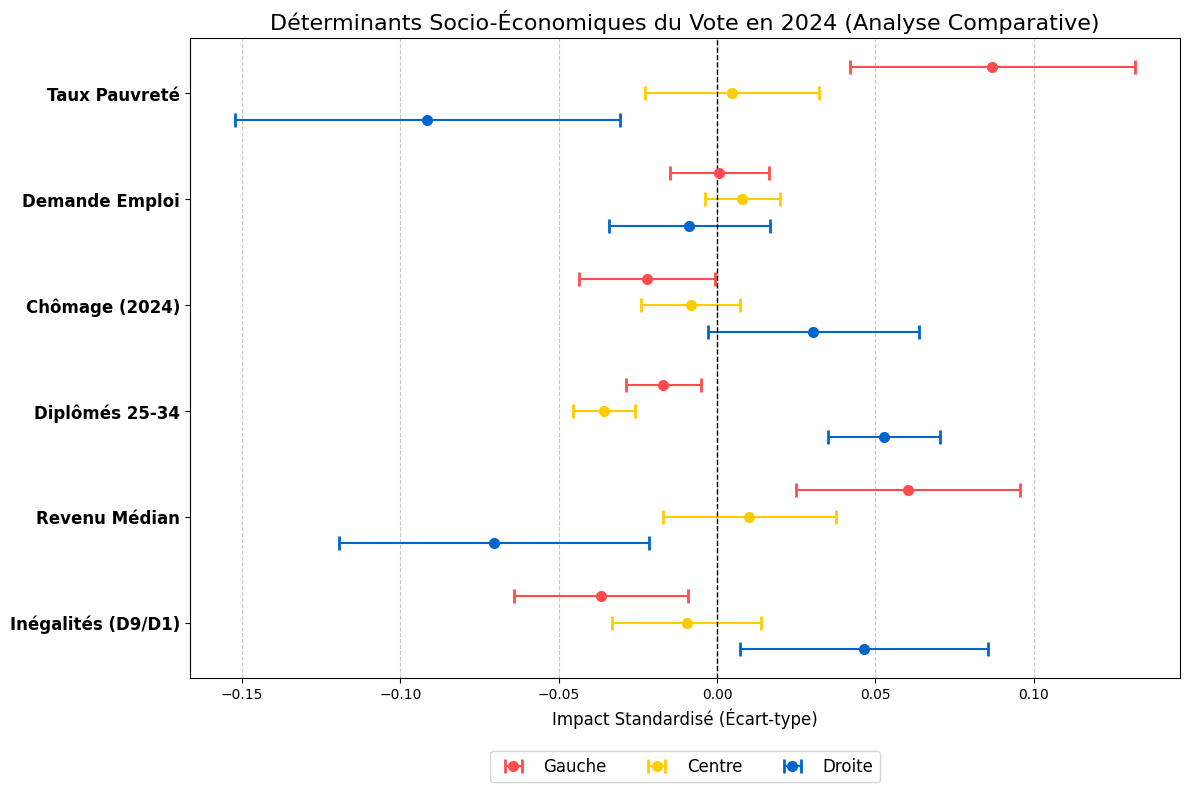

In [ ]:
# On copie les valeurs exactes (Coefs et erreurs) de la régression précédente

data_viz_2024 = {
    'Variable': ['Inégalités (D9/D1)', 'Revenu Médian', 'Diplômés 25-34', 
                 'Chômage (2024)', 'Demande Emploi', 'Taux Pauvreté'],
    
    # GAUCHE 2024 (Rappel : Pauvreté explose, Revenu positif)
    'G_coef': [-0.0367, 0.0603, -0.0170, -0.0221, 0.0007, 0.0869],
    'G_err':  [0.014,   0.018,  0.006,   0.011,   0.008,  0.023],
    
    # CENTRE 2024 (Rappel : Revenu et Chômage devenus non significatifs)
    'C_coef': [-0.0096, 0.0102, -0.0358, -0.0083, 0.0080, 0.0046],
    'C_err':  [0.012,   0.014,  0.005,   0.008,   0.006,  0.014],
    
    # DROITE 2024 (Rappel : Rejet Richesse et Pauvreté, aime Inégalités)
    'D_coef': [0.0464, -0.0705, 0.0528, 0.0303, -0.0088, -0.0915],
    'D_err':  [0.020,   0.025,  0.009,   0.017,   0.013,  0.031]
}

df_viz = pd.DataFrame(data_viz_2024)

# Calcul des intervalles de confiance à 95% (1.96 * StdErr)
df_viz['G_ci'] = df_viz['G_err'] * 1.96
df_viz['C_ci'] = df_viz['C_err'] * 1.96
df_viz['D_ci'] = df_viz['D_err'] * 1.96

# Graphique
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(df_viz))
height = 0.25  # Épaisseur des barres

colors = {'G': '#ff4d4d', 'C': '#ffcc00', 'D': '#0066cc'} # Rouge, Jaune, Bleu

# On visualise chaque parti

# GAUCHE
ax.errorbar(df_viz['G_coef'], y_pos + height, xerr=df_viz['G_ci'], 
            fmt='o', color=colors['G'], label='Gauche', capsize=5, markeredgewidth=2)

# CENTRE
ax.errorbar(df_viz['C_coef'], y_pos, xerr=df_viz['C_ci'], 
            fmt='o', color=colors['C'], label='Centre', capsize=5, markeredgewidth=2)

# DROITE
ax.errorbar(df_viz['D_coef'], y_pos - height, xerr=df_viz['D_ci'], 
            fmt='o', color=colors['D'], label='Droite', capsize=5, markeredgewidth=2)

ax.set_yticks(y_pos)
ax.set_yticklabels(df_viz['Variable'], fontsize=12, fontweight='bold')
ax.axvline(0, color='black', linestyle='--', linewidth=1) # Ligne zéro
ax.set_xlabel('Impact Standardisé (Écart-type)', fontsize=12)
ax.set_title('Déterminants Socio-Économiques du Vote en 2024 (Analyse Comparative)', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

L'analyse comparative entre les deux périodes met en lumière une recomposition majeure des déterminants économiques du vote, particulièrement visible au niveau du bloc central. Alors que les modèles précédents identifiaient le Centre comme le vote de la stabilité économique, fortement corrélé à la richesse des territoires et à la faiblesse du chômage, l'année 2024 marque une rupture statistique nette. Les indicateurs de revenu médian et de chômage perdent leur significativité, suggérant que le vote centriste s'est déconnecté de ses ancrages matériels traditionnels. Il ne s'appuie plus sur une géographie des "gagnants" de l'économie, mais semble flotter sociologiquement, ne conservant comme marqueur structurel fort que sa difficulté persistante à capter le vote des jeunes diplômés.

Parallèlement, la dynamique électorale à Gauche témoigne d'une polarisation sociologique accrue, illustrant un phénomène de "grand écart" territorial. D'une part, la corrélation avec le taux de pauvreté s'est considérablement intensifiée, confirmant le rôle de refuge de la Gauche pour les zones les plus précarisées. D'autre part, l'influence positive du revenu médian s'est également renforcée, validant l'hypothèse d'un ancrage croissant au sein de catégories urbaines plus aisées. Cette double dynamique contraste avec l'incapacité continue de ce bloc à capter le "vote chômage", confirmant la fracture entre une gauche des métropoles et des quartiers prioritaires, et un électorat populaire intermédiaire qui lui échappe toujours.

Enfin, la Droite consolide sa position spécifique en s'affirmant comme le vote des territoires en tension, pris en étau entre richesse et grande exclusion. Les résultats de 2024 montrent un rejet explicite de ce bloc tant par les départements les plus riches que par les zones de pauvreté monétaire intense, contrairement à la Gauche. La Droite performe ainsi dans l'espace intermédiaire, capitalisant sur les inégalités de revenus et le sentiment de déclassement économique, sans pour autant parvenir à s'implanter dans les foyers de précarité les plus profonds. Cette configuration dessine une tripartition où chaque bloc occupe désormais un segment distinct de la réalité sociale : la précarité et l'aisance urbaine pour la Gauche, le déclassement intermédiaire pour la Droite, et une position centrale devenue économiquement illisible.